In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = 20,15

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

In [4]:
ori_df = pd.read_csv('./clustering/(최종)통합데이터.csv', encoding='euc-kr')
ori_df.head(5)

,역사명,동별,위도,경도,일평균승하차(명),상가 면적,공실면적(㎡)(2024년기준),거주자수,남여비율,1인 가구수 레벨,...,20~40대 인구 수 레벨,고속버스 터미널,기차,여객 터미널,주변 관광지,주변 대학교,일평균(원),kmeans_group,gmm_group,kmedoids
0,가야,가야1동,35.155883,129.042817,5799,11.0,11.0,25217,0.95,83,...,57,NaN,1.0,NaN,0,0,1926082,0,0,3
1,감전,감전동,35.155528,128.991146,6107,10.0,10.0,12825,1.12,56,...,31,NaN,NaN,NaN,0,0,2535118,0,0,3
2,강서구청,대저1동,35.211247,128.981756,4251,NaN,NaN,2076,1.22,26,...,4,NaN,NaN,NaN,0,0,2029127,0,0,3
3,개금,개금1동,35.153284,129.020533,13621,37.0,0.0,27187,0.94,79,...,65,NaN,NaN,NaN,0,1,4717075,3,0,1
4,거제(법원·검찰청),거제3동,35.188589,129.073941,9546,16.0,0.0,27403,0.91,14,...,13,NaN,NaN,NaN,0,1,3099526,0,0,3


In [5]:
df = ori_df[['역사명','일평균승하차(명)','거주자수','1인 가구수(세대)','20~40대 인구수','주택수','사업체수','일평균(원)']]
df

,역사명,일평균승하차(명),거주자수,1인 가구수(세대),20~40대 인구수,주택수,사업체수,일평균(원)
0,가야,5799,25217,6291,10543,17.50,49,1926082
1,감전,6107,12825,5461,4622,4.00,57,2535118
2,강서구청,4251,2076,4630,582,0.33,109,2029127
3,개금,13621,27187,2501,12227,10.00,36,4717075
4,거제(법원·검찰청),9546,27403,3093,11589,12.70,114,3099526
...,...,...,...,...,...,...,...,...
95,충렬사(안락),5398,18134,1851,6902,4.00,35,1117126
96,토성,13846,28882,2110,11174,17.00,7,6002230
97,하단,29080,21407,4414,9331,14.00,36,11010043
98,해운대,18794,24427,5075,10348,13.00,80,8828608


In [6]:
df.isnull().sum()

역사명           0
일평균승하차(명)     0
거주자수          0
1인 가구수(세대)    0
20~40대 인구수    0
주택수           0
사업체수          0
일평균(원)        0
dtype: int64

In [7]:
df = df.fillna(0)
df.isnull().sum()

역사명           0
일평균승하차(명)     0
거주자수          0
1인 가구수(세대)    0
20~40대 인구수    0
주택수           0
사업체수          0
일평균(원)        0
dtype: int64

### 산점도

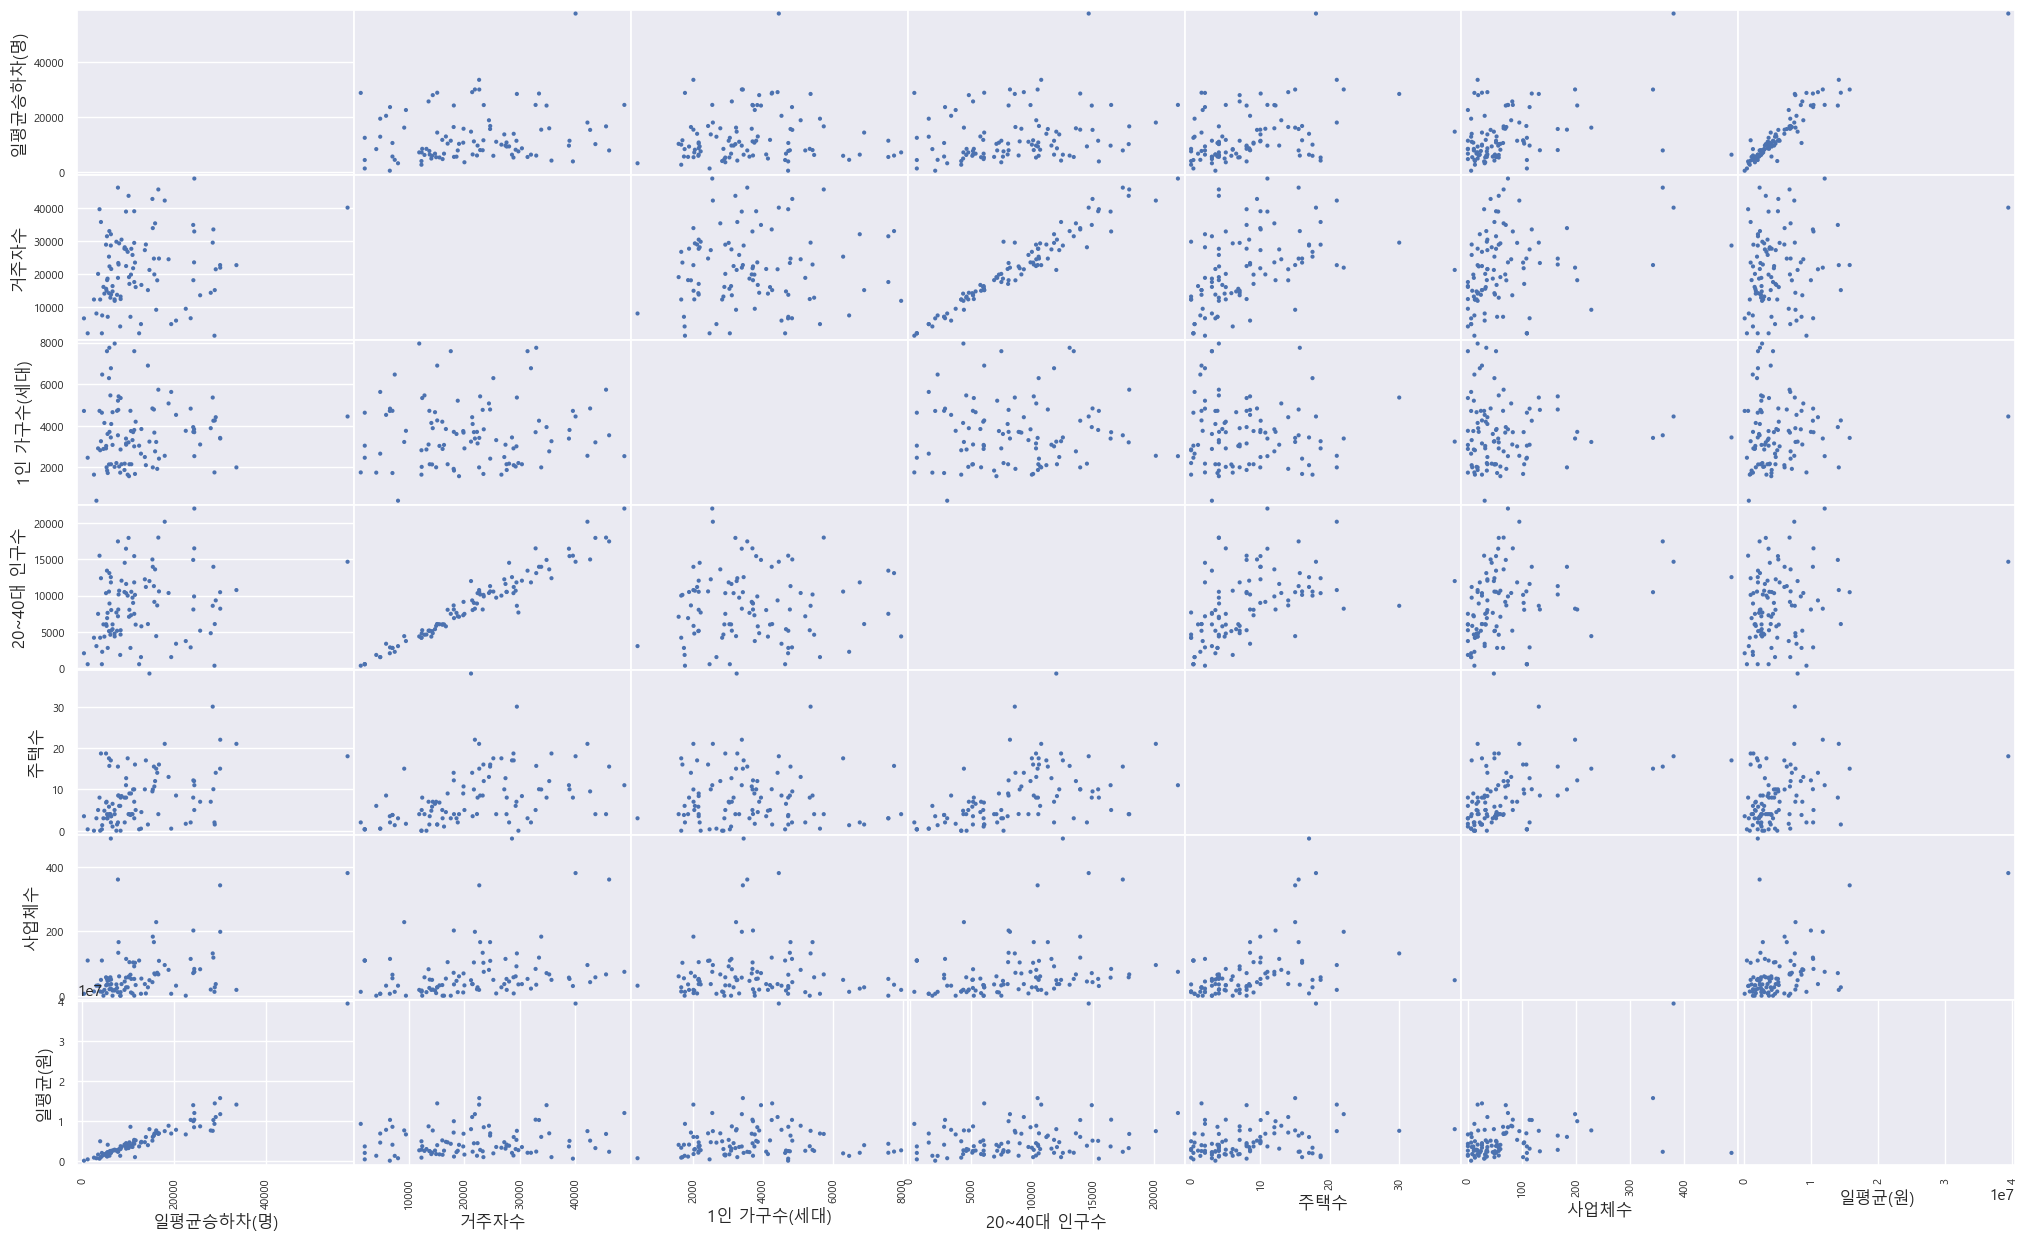

In [8]:
# 전체 변수와 일평균 수익 산점도
from pandas.plotting import scatter_matrix
scatter_matrix(df,
               alpha=1, ## 데이터 포인트의 투명도 1 = 가장진함, 0 = 완전투명
               figsize=(25,15), ## 캔버스 사이즈 조절
               diagonal=None) ## 대각 원소에는 아무것도 그리지 않는다.
plt.show()

#### 일평균 운행수익과 각 변수별 산점도

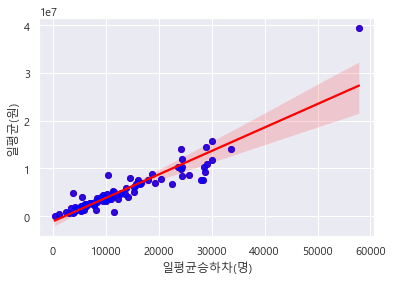

In [7]:
# 일평균 승하차와 일평균 수익 산점도
sns.regplot(x='일평균승하차(명)', y='일평균(원)', data=df, color="red")
plt.scatter(df[['일평균승하차(명)']], df[['일평균(원)']], alpha=0.8, color='blue')
plt.show()

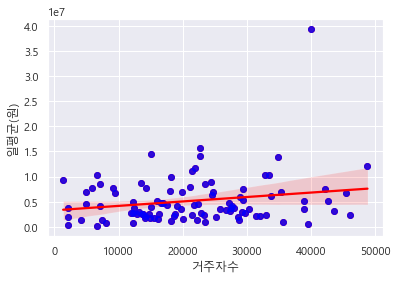

In [8]:
# 거주자수와 일평균 수익 산점도
sns.regplot(x='거주자수', y='일평균(원)', data=df, color="red")
plt.scatter(df[['거주자수']], df[['일평균(원)']], alpha=0.8, color='blue')
plt.show()

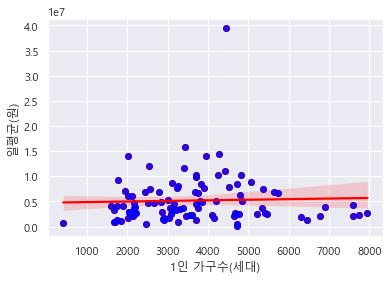

In [9]:
# 1인 가구수(세대)와 일평균 수익 산점도
sns.regplot(x='1인 가구수(세대)', y='일평균(원)', data=df, color="red")
plt.scatter(df[['1인 가구수(세대)']], df[['일평균(원)']], alpha=0.8, color='blue')
plt.show()

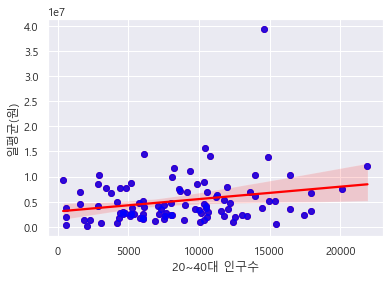

In [10]:
# 20~40대 인구수와 일평균 수익 산점도
sns.regplot(x='20~40대 인구수', y='일평균(원)', data=df, color="red")
plt.scatter(df[['20~40대 인구수']], df[['일평균(원)']], alpha=0.8, color='blue')
plt.show()

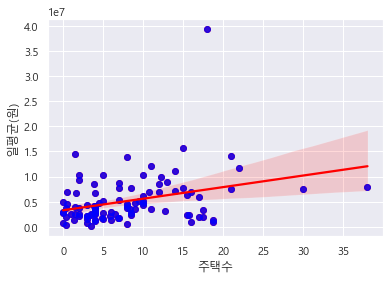

In [11]:
# 주택수와 일평균 수익 산점도
sns.regplot(x='주택수', y='일평균(원)', data=df, color="red")
plt.scatter(df[['주택수']], df[['일평균(원)']], alpha=0.8, color='blue')
plt.show()

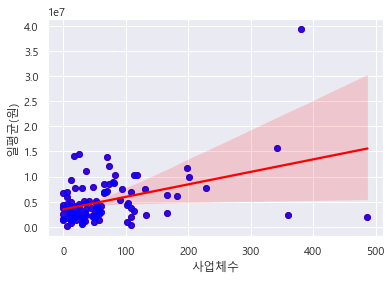

In [12]:
# 사업체수와 일평균 수익 산점도
sns.regplot(x='사업체수', y='일평균(원)', data=df, color="red")
plt.scatter(df[['사업체수']], df[['일평균(원)']], alpha=0.8, color='blue')
plt.show()

#### 상관계수 확인

0.1 이상은 비교해볼만 가치가 있다.\
(유의미한 결과가 있을 수 있다)

In [9]:
df_dr_corr = df.corr()
df_dr_corr

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_19880\3119545994.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_dr_corr = df.corr()


,일평균승하차(명),거주자수,1인 가구수(세대),20~40대 인구수,주택수,사업체수,일평균(원)
일평균승하차(명),1.000000,0.177225,0.033473,0.214194,0.365521,0.355560,0.919696
거주자수,0.177225,1.000000,0.041797,0.969201,0.434329,0.278248,0.199948
1인 가구수(세대),0.033473,0.041797,1.000000,0.020473,-0.057933,-0.011647,0.036853
20~40대 인구수,0.214194,0.969201,0.020473,1.000000,0.472274,0.294686,0.235938
주택수,0.365521,0.434329,-0.057933,0.472274,1.000000,0.410795,0.322079
사업체수,0.355560,0.278248,-0.011647,0.294686,0.410795,1.000000,0.420679
일평균(원),0.919696,0.199948,0.036853,0.235938,0.322079,0.420679,1.000000


##### 히트맵 확인

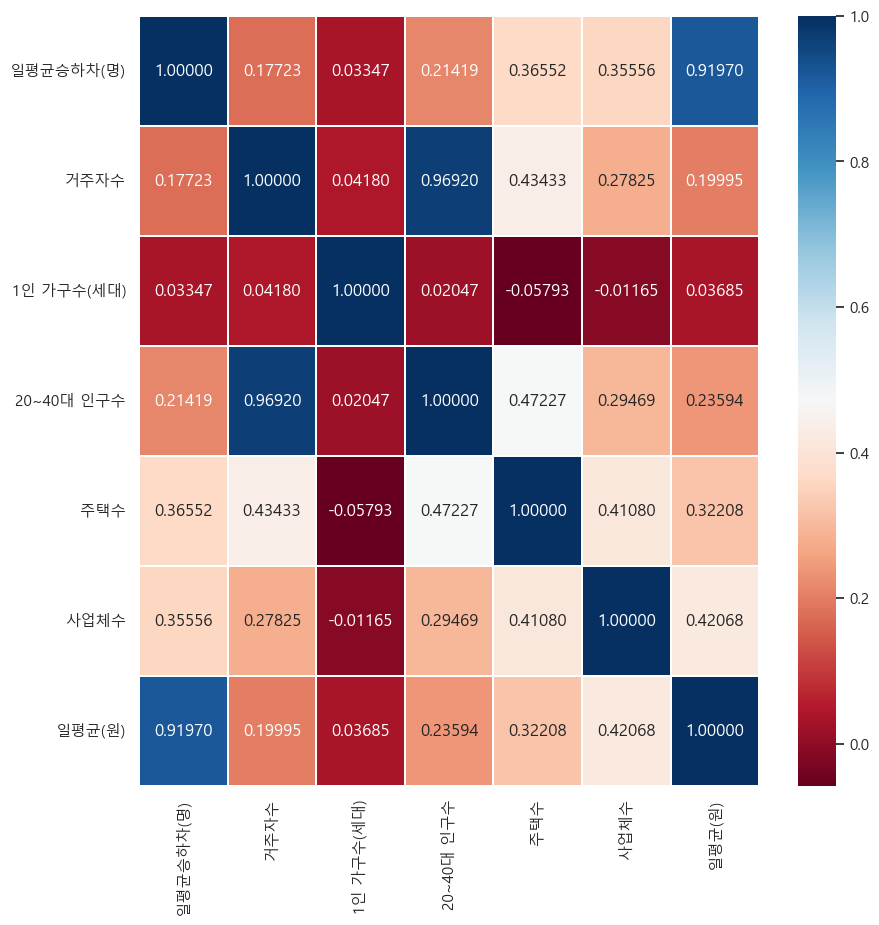

In [10]:
plt.figure(figsize=(10,10))
color_map = plt.cm.RdBu

sns.heatmap(df_dr_corr, annot=True, fmt='.5f', linewidths=0.1, cmap=color_map)
plt.show()

## statsmodels.formula.api을 통한 회귀분석

statsmodels.formula.api을 사용하면 회귀모델 공식을 먼저 작성한 후 공식에 따라 회귀분석을 시행한다.\
상수항 추가나 범주형 변수의 더미변수화를 자동으로 해결해주는 장점이 있다.

In [22]:
# statsmodels.formula.api의 ols 함수로 회귀분석 실시
from statsmodels.formula.api import ols

In [16]:
a = df[["일평균(원)"]]
b = df[['일평균승하차(명)','거주자수','1인 가구수(세대)','20~40대 인구수','주택수','사업체수']]

In [17]:
res = ols('a~b', data=df).fit()

In [18]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      a   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     95.23
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           1.68e-37
Time:                        17:59:35   Log-Likelihood:                -1583.4
No. Observations:                 100   AIC:                             3181.
Df Residuals:                      93   BIC:                             3199.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.385e+06   6.32e+05     -2.191      0.0

## statsmodels.api을 통한 회귀분석

statsmodels.api을 통해서 회귀분석을 시행할 경우 별도로 독립변수에 상수항을 추가해줘야 한다.\
상수항을 추가하기 위해서는 statsmodels가 제공하는 add_constant API를 사용해주면 간단하다.

In [19]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [20]:
x = df[['일평균승하차(명)','거주자수','1인 가구수(세대)','20~40대 인구수','주택수','사업체수']]

In [21]:
y = df[['일평균(원)']]

In [22]:
x=sm.add_constant(x)

In [23]:
# Train the MLR / 회귀모델적합
# OLS(Ordinary Least Squares)
fullModel = sm.OLS(y,x)
fittedFullModel = fullModel.fit()

In [24]:
print(fittedFullModel.summary())

                            OLS Regression Results                            
Dep. Variable:                 일평균(원)   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     95.23
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           1.68e-37
Time:                        17:59:39   Log-Likelihood:                -1583.4
No. Observations:                 100   AIC:                             3181.
Df Residuals:                      93   BIC:                             3199.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.385e+06   6.32e+05     -2.191      0.0

In [34]:
# # 테스트 훈련 데이터 분할
# x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=42)

In [35]:
# # Train the MLR / 회귀모델적합
# # OLS(Ordinary Least Squares)
# fullModel = sm.OLS(y_train,x_train)
# fittedFullModel = fullModel.fit()

In [36]:
# print(fittedFullModel.summary())

                            OLS Regression Results                            
Dep. Variable:                 일평균(원)   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     75.10
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           8.32e-27
Time:                        01:49:35   Log-Likelihood:                -1111.6
No. Observations:                  70   AIC:                             2237.
Df Residuals:                      63   BIC:                             2253.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.875e+06   7.76e+05     -2.414      0.0

- R-squared : 0.930
- Adj. R-squared : 0.925
- P>[t] : 일평균승하차, 1인 가구수, 사업체 수만 유의미한 결과가 나옴

#### 선형 회귀

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
mlr = LinearRegression()
multi_model = mlr.fit(x_train, y_train) 

In [39]:
# 훈련 정확도
multi_model.score(x_train, y_train)

0.8773414134994624

In [40]:
multi_model.score(x_test, y_test)

0.7057791254507839

#### 예측

In [41]:
my_predict = mlr.predict(x_test)
my_predict

array([[ 1592082.30041016],
       [ 6628528.97854007],
       [ 1656961.78783854],
       [ 2315710.5705747 ],
       [  334335.46369493],
       [ 4259176.04887026],
       [ 3421817.50854394],
       [10802461.2543278 ],
       [  987170.86486706],
       [ 1127963.77723799],
       [ 3018137.96866567],
       [ 3726037.67085945],
       [ 1396027.488808  ],
       [13655782.41167287],
       [ 4914253.18110956],
       [ 3868484.4401602 ],
       [ 4086796.53582124],
       [ 8208420.30832593],
       [ 1238522.24744897],
       [ 1492894.85454861],
       [11406654.02270939],
       [ 1768801.9546512 ],
       [ 4111819.69834452],
       [ 6506620.43767706],
       [12975519.3162607 ],
       [ 4438585.97074192],
       [ 4761523.5661481 ],
       [ 4938702.33612316],
       [ 1795121.54778116],
       [ 4161158.30675782]])

#### 시각화

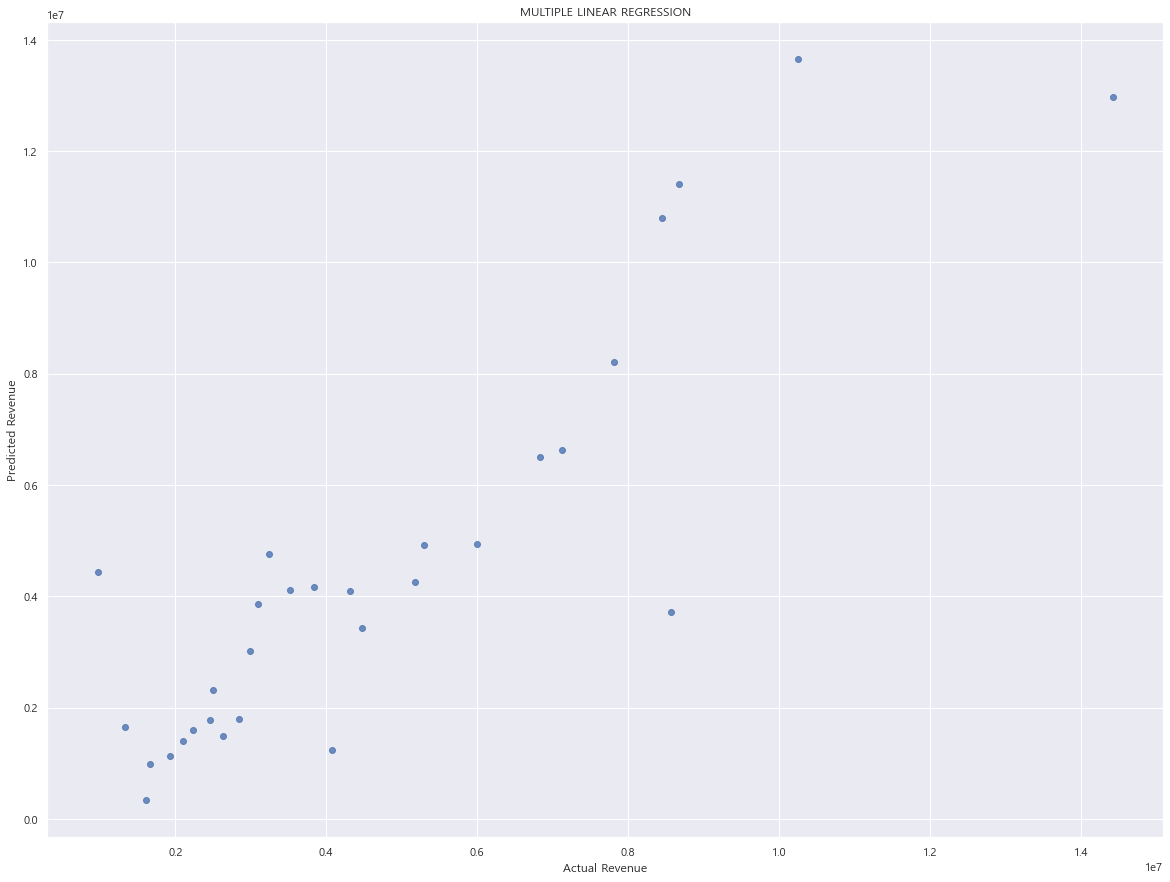

In [42]:
plt.figure(figsize=(20,15))
plt.scatter(y_test, my_predict, alpha=0.8)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

#### 상관계수 확인

In [43]:
print(mlr.coef_)

[[ 0.00000000e+00  4.95359181e+02 -9.28302756e+00 -1.45397310e+01
   1.07625450e+02 -5.87787154e+04  7.13062150e+03]]


## 다중 회귀(Multiple regression)

- 강의때 특성 공학과 규제 참고

In [102]:
x = df[['일평균승하차(명)','1인 가구수(세대)','20~40대 인구수','사업체수']]

In [34]:
y = df["일평균(원)"]

#### 다중회귀 적합성 확인

##### 선형성 확인
- 산점도 확인

##### 다중공선성 확인

In [103]:
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_XbyVIF(x):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(x.values, i)
                         for i in range(x.shape[1])]
    vif['Feature'] = x.columns
    return vif
vif = feature_engineering_XbyVIF(x)
print(vif)

   VIF_Factor     Feature
0    3.197575   일평균승하차(명)
1    3.377255  1인 가구수(세대)
2    3.901831  20~40대 인구수
3    2.066398        사업체수


##### 등분산성 확인
: 데이터셋의 분산이 같은지를 검정하는 것

귀무가설 H0: 데이터셋의 분산이 같다.\
    H0 : k개의 집단에 대한 분산이 동일하다

대립가설 H1: 데이터셋의 분산이 같지 않다.\
    H1 : k개중 하나라도 다른 분산이 존재한다

- Bartlett’s test
    - 비정규성에 민감하기 때문에 정규성을 따를 때만 사용해야하는 검정 방법

- Levene’s test
    - 정규분포와 관계없이 연속적인 분포로부터 데이터를 구했을 때 사용하는 검정 방법

정규성을 가정할 수 없을 때에는 Levene 검정을 사용하는 것이 좋지만, 정규성이 확실하다면 Bartlett 검정을 사용하는 것이 정확하다.

In [57]:
x = df[['일평균승하차(명)','1인 가구수(세대)','20~40대 인구수','사업체수']]

In [58]:
y = df[['일평균(원)']]

In [40]:
from scipy.stats import levene
l_1 = levene(df['일평균승하차(명)'], df['일평균(원)'])
l_2 = levene(df['1인 가구수(세대)'], df['일평균(원)'])
l_3 = levene(df['20~40대 인구수'], df['일평균(원)'])
l_4 = levene(df['사업체수'], df['일평균(원)'])
print(l_1,l_2,l_3,l_4, sep="\n")

LeveneResult(statistic=51.66073237152675, pvalue=1.3163552833264762e-11)
LeveneResult(statistic=51.845673045497115, pvalue=1.2216519980792902e-11)
LeveneResult(statistic=51.75435020321567, pvalue=1.2675230635551636e-11)
LeveneResult(statistic=51.88573079728792, pvalue=1.2020640853249887e-11)


pvalue <= 0.05 => 귀무가설 기각 + 대립가설 채택 => 모두 분산이 다르다.\
(p-value > 0.05 => 귀무가설 기각 X)

##### 정규성 확인
- QQ plot 사용
    - 빨간 선에 가까울수록 정규성 만족

In [37]:
use_df = df[['일평균승하차(명)','1인 가구수(세대)','20~40대 인구수','사업체수','일평균(원)']]
use_df

,일평균승하차(명),거주자수,1인 가구수(세대),20~40대 인구수,사업체수,일평균(원)
0,5799,25217,6291,10543,49,1926082
1,6107,12825,5461,4622,57,2535118
2,4251,2076,4630,582,109,2029127
3,13621,27187,2501,12227,36,4717075
4,9546,27403,3093,11589,114,3099526
...,...,...,...,...,...,...
95,5398,18134,1851,6902,35,1117126
96,13846,28882,2110,11174,7,6002230
97,29080,21407,4414,9331,36,11010043
98,18794,24427,5075,10348,80,8828608


In [74]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from scipy.stats import probplot

In [75]:
# 회귀분석 수행
ols_1 = sm.OLS(y,use_df["일평균승하차(명)"])
ols_2 = sm.OLS(y,use_df["1인 가구수(세대)"])
ols_3 = sm.OLS(y,use_df["20~40대 인구수"])
ols_4 = sm.OLS(y,use_df["사업체수"])

# 회귀분석 결과에서 잔차만 추출
resid1 = ols_1.fit().resid
resid2 = ols_2.fit().resid
resid3 = ols_3.fit().resid
resid4 = ols_4.fit().resid

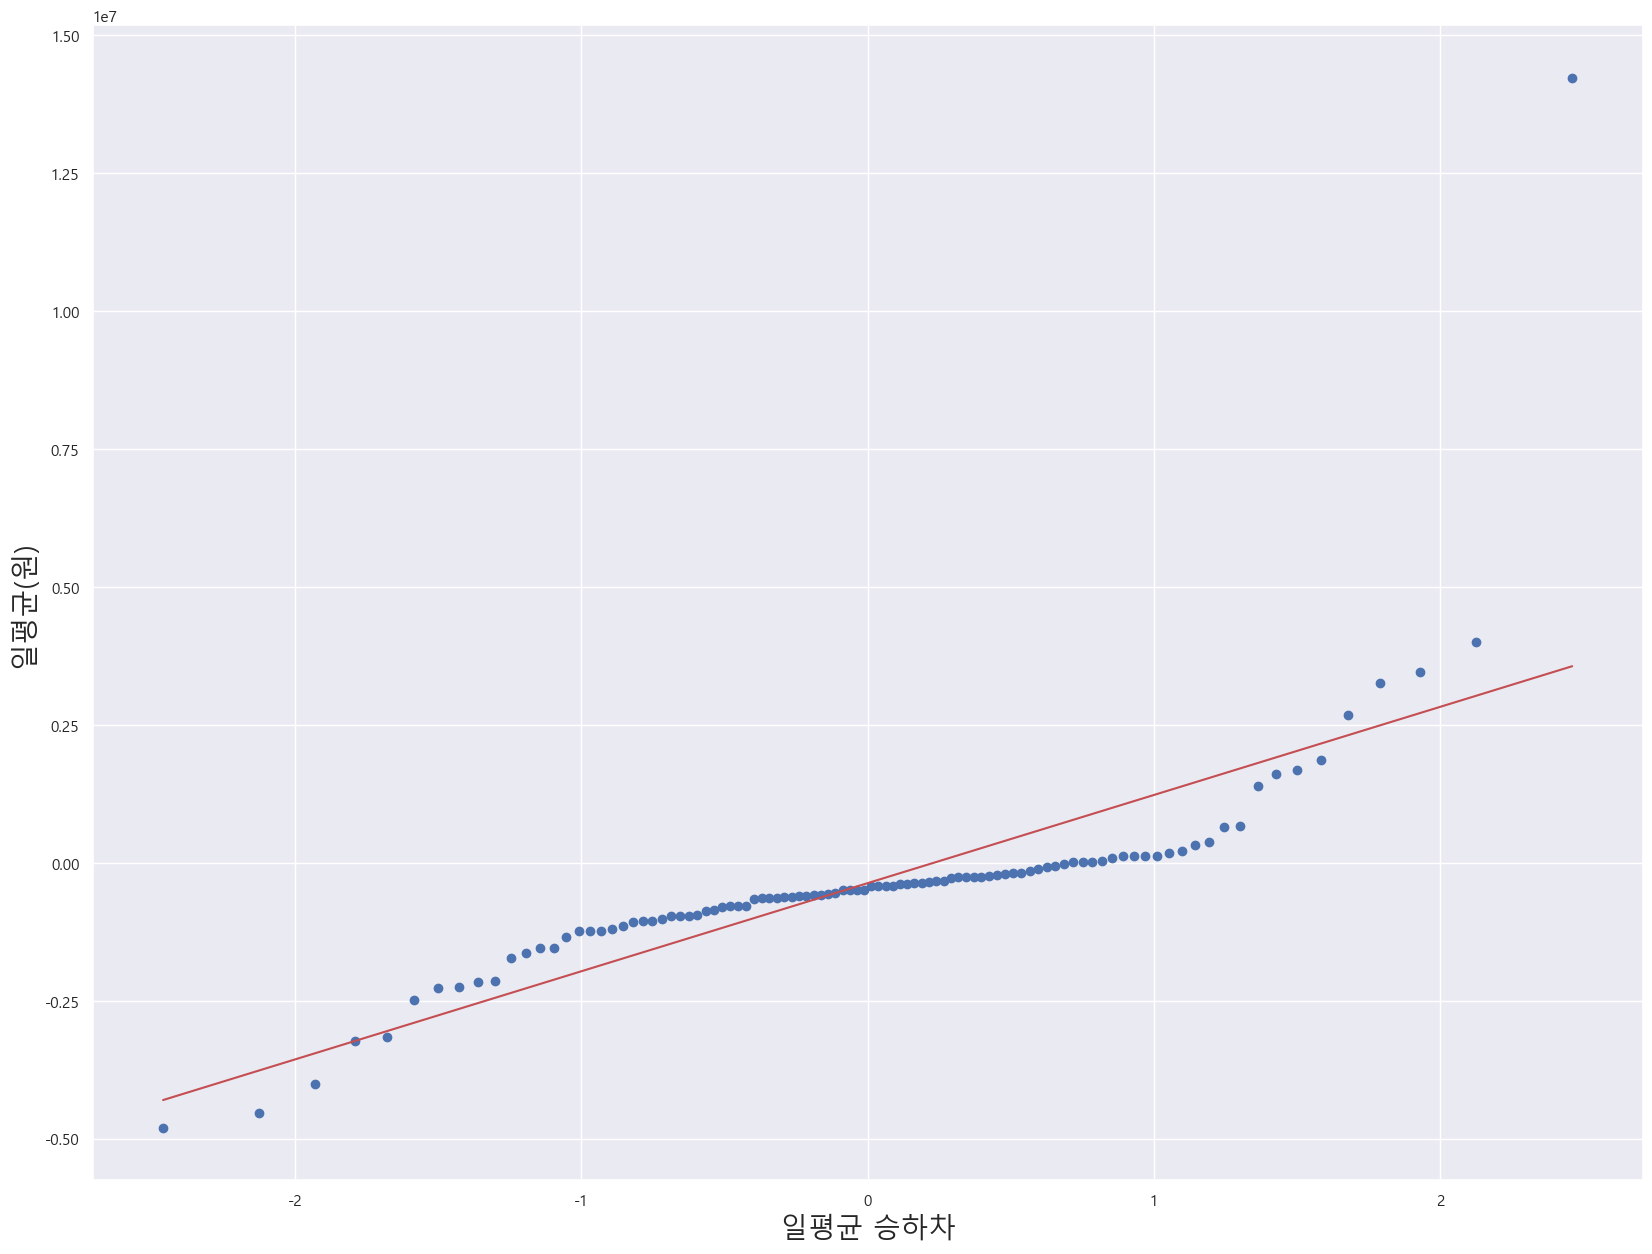

In [93]:
# 일평균승하차
plt.figure()
probplot(resid1, plot=plt)
plt.title("")
plt.xlabel('일평균 승하차', fontsize=20)
plt.ylabel('일평균(원)', fontsize=20)
plt.show()

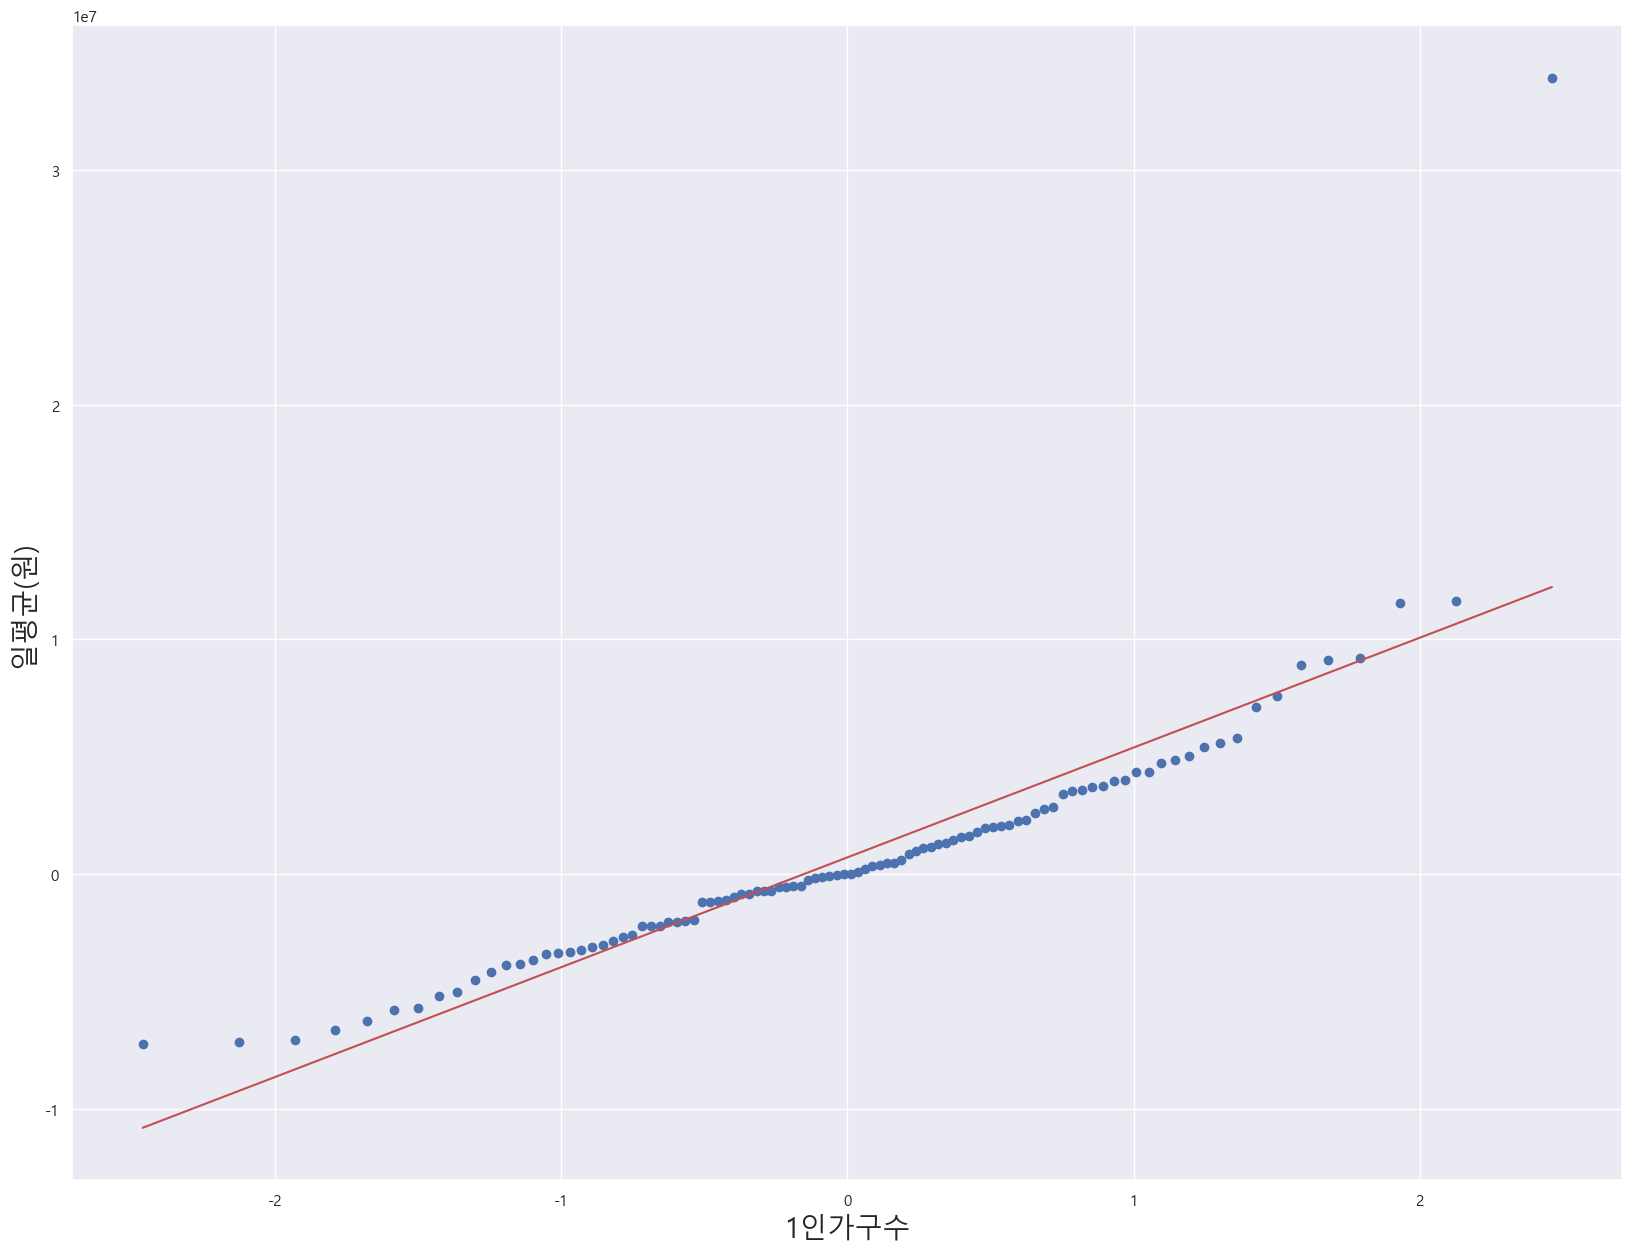

In [91]:
# 1인 가구수
plt.figure()
probplot(resid2, plot=plt)
plt.title("")
plt.xlabel('1인가구수', fontsize=20)
plt.ylabel('일평균(원)', fontsize=20)
plt.show()

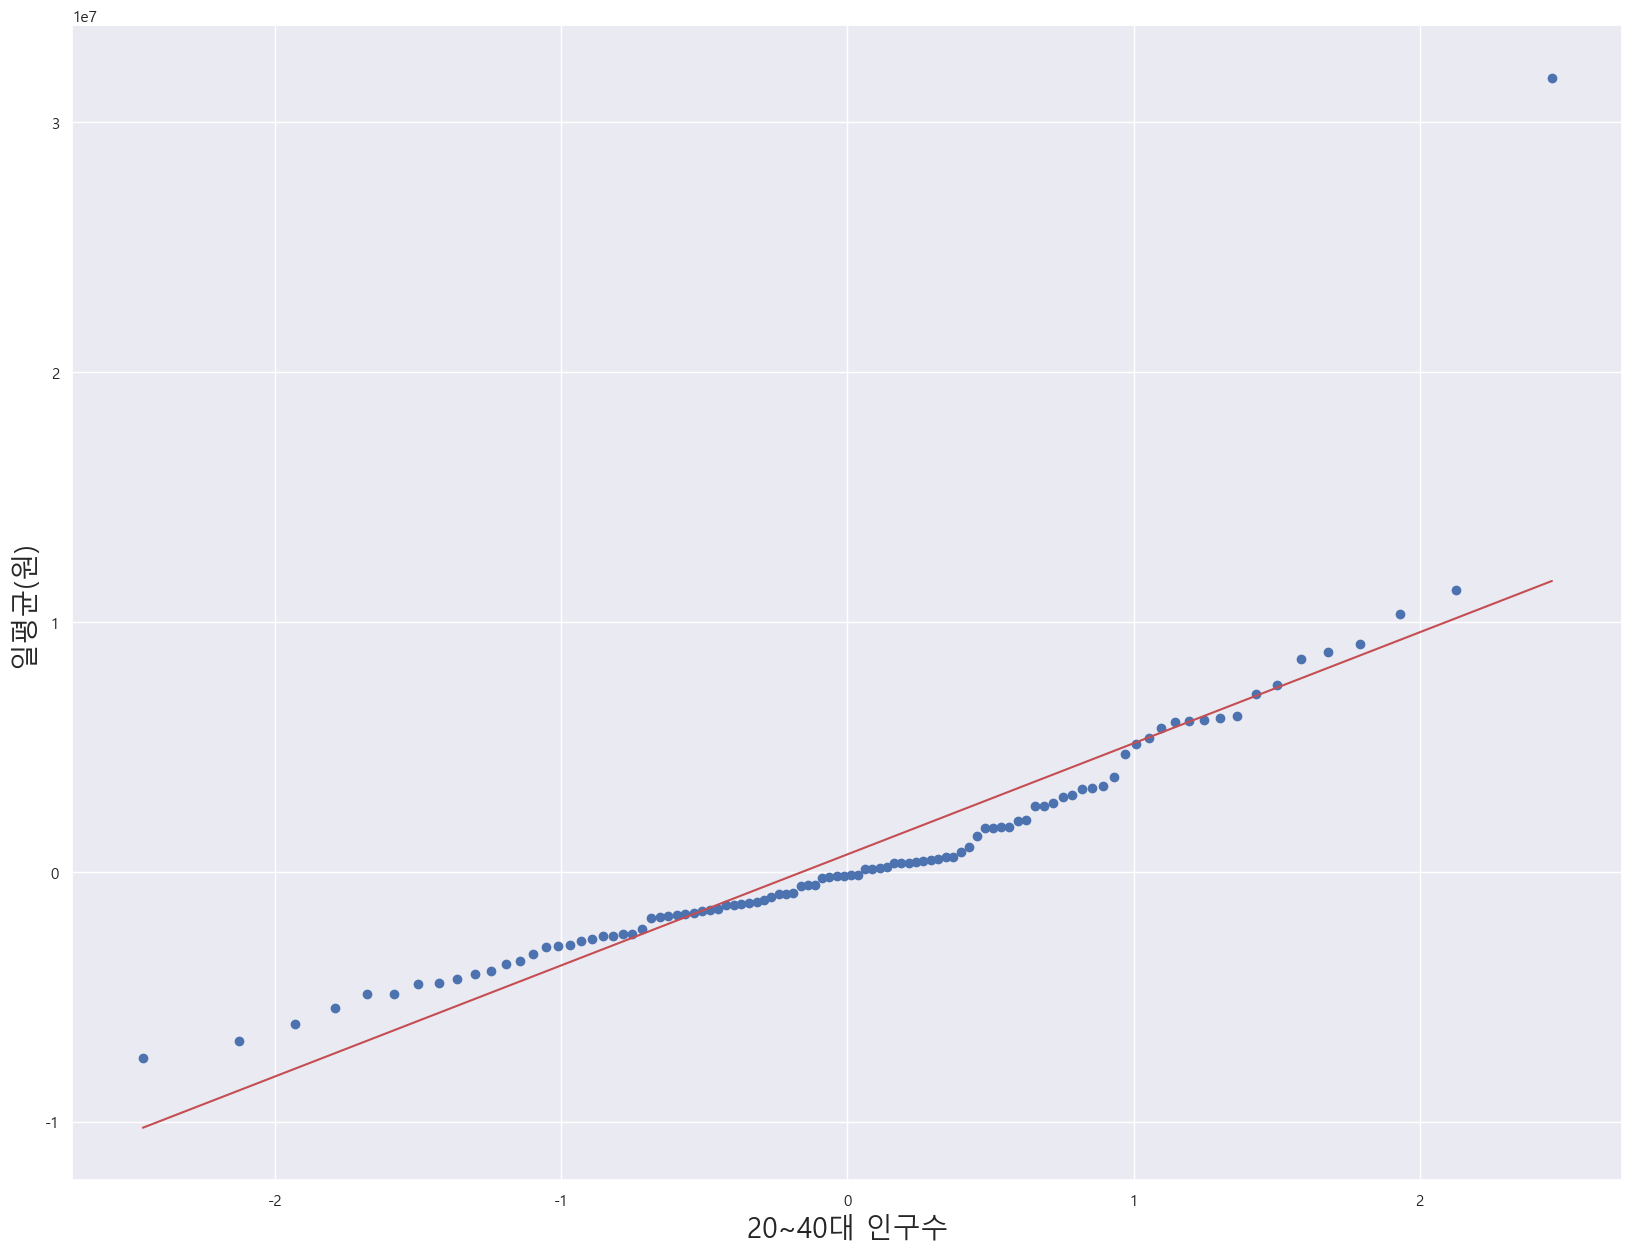

In [98]:
# 20~40대 인구수
plt.figure()
probplot(resid3, plot=plt)
plt.title("")
plt.xlabel('20~40대 인구수', fontsize=20)
plt.ylabel('일평균(원)', fontsize=20)
plt.show()

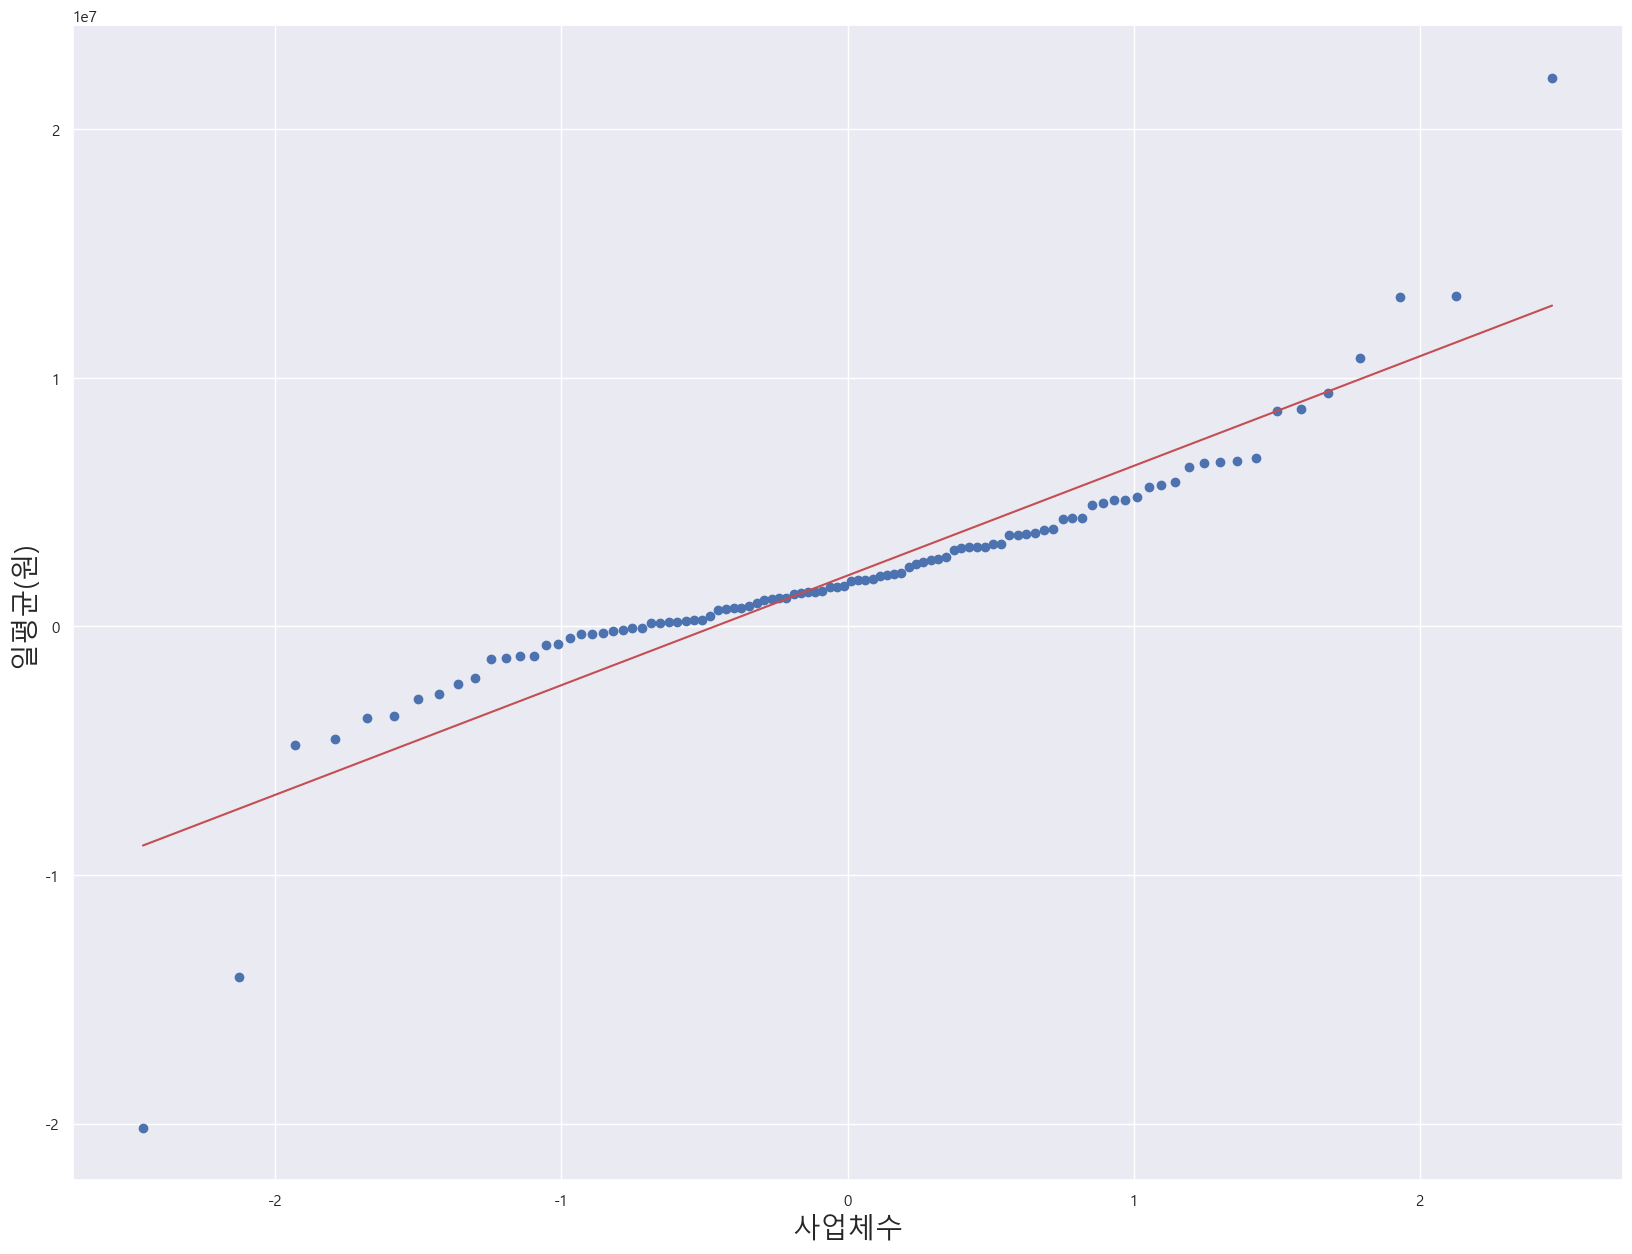

In [100]:
# 사업체수
plt.figure()
probplot(resid4, plot=plt)
plt.title("")
plt.xlabel('사업체수', fontsize=20)
plt.ylabel('일평균(원)', fontsize=20)
plt.show()

#### 다중 회귀 분석

In [36]:
# 넘파이 배열로 변환
arr_df = x.to_numpy()
arr_df

array([[5.7990e+03, 2.5217e+04, 6.2910e+03, 1.0543e+04, 1.7500e+01,
        4.9000e+01],
       [6.1070e+03, 1.2825e+04, 5.4610e+03, 4.6220e+03, 4.0000e+00,
        5.7000e+01],
       [4.2510e+03, 2.0760e+03, 4.6300e+03, 5.8200e+02, 3.3000e-01,
        1.0900e+02],
       [1.3621e+04, 2.7187e+04, 2.5010e+03, 1.2227e+04, 1.0000e+01,
        3.6000e+01],
       [9.5460e+03, 2.7403e+04, 3.0930e+03, 1.1589e+04, 1.2700e+01,
        1.1400e+02],
       [2.4395e+04, 3.2821e+04, 3.6940e+03, 1.6471e+04, 5.0000e+00,
        8.3000e+01],
       [1.6701e+04, 2.4654e+04, 2.4240e+03, 1.0568e+04, 1.6000e+01,
        1.0800e+02],
       [1.5271e+04, 4.2636e+04, 4.8350e+03, 1.4949e+04, 9.5000e+00,
        4.2000e+01],
       [2.2544e+04, 9.4870e+03, 3.7610e+03, 3.7580e+03, 1.6700e+00,
        0.0000e+00],
       [7.0210e+03, 1.2321e+04, 2.0290e+03, 4.7890e+03, 5.0000e+00,
        1.6000e+01],
       [5.1850e+03, 1.5518e+04, 3.0350e+03, 6.0670e+03, 6.8000e+00,
        3.2000e+01],
       [1.5857e+04, 3

In [37]:
from sklearn.model_selection import train_test_split
# 테스트 훈련 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, random_state=42)

In [38]:
# 사이킷런 변환기
from sklearn.preprocessing import PolynomialFeatures
# fit(), transform() 메서드 제공

In [39]:
poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))
# 훈련(fit)을 해야 변환(transform)이 가능
# 두 메서드를 한번에 처리하는 fit_transform 메서드도 존재

[[1. 2. 3. 4. 6. 9.]]


In [40]:
poly = PolynomialFeatures(include_bias=False) # 사이킷런은 자동으로 특성에 추가된 절편 항 무시함(default=False)
# poly.fit([[2,3]])
# print(poly.transform([[2,3]]))
poly.fit(x_train)
train_poly = poly.transform(x_train)
print(train_poly.shape)

(70, 27)


PolynomialFeatures 클래스는 9개의 특성이 어떻게 만들어졌는지 확인하는 아주 좋은 방법을 제공\
-> get_feature_name_out() 메서드 호출 시 9개의 특성이 각각 어떤 조합으로 만들어졌는지 알려줌

In [41]:
poly.get_feature_names_out()

array(['일평균승하차(명)', '거주자수', '1인 가구수(세대)', '20~40대 인구수', '주택수', '사업체수',
       '일평균승하차(명)^2', '일평균승하차(명) 거주자수', '일평균승하차(명) 1인 가구수(세대)',
       '일평균승하차(명) 20~40대 인구수', '일평균승하차(명) 주택수', '일평균승하차(명) 사업체수',
       '거주자수^2', '거주자수 1인 가구수(세대)', '거주자수 20~40대 인구수', '거주자수 주택수',
       '거주자수 사업체수', '1인 가구수(세대)^2', '1인 가구수(세대) 20~40대 인구수',
       '1인 가구수(세대) 주택수', '1인 가구수(세대) 사업체수', '20~40대 인구수^2',
       '20~40대 인구수 주택수', '20~40대 인구수 사업체수', '주택수^2', '주택수 사업체수', '사업체수^2'],
      dtype=object)

- '일평균승하차(명)^2' : '일평균승하차(명)'의 제곱
- 일평균승하차(명) 사업체수 : '일평균승하차(명)'와'사업체수'의 곱

In [42]:
test_poly = poly.transform(x_test) #훈련한 세트를 기준으로 테스트 세트 변환

#### 다중회귀(Linear Regression) 모델 훈련하기

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, y_train)
print(lr.score(train_poly, y_train))
print(lr.score(test_poly, y_test))

0.9816421800046835
0.7234001872911544


In [44]:
# 특성 추가(5제곱)
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(x_train)
train_poly = poly.transform(x_train)
test_poly = poly.transform(x_test)
print(train_poly.shape)

(70, 461)


In [45]:
# 재훈련
lr.fit(train_poly, y_train)
print(lr.score(train_poly, y_train))
print(lr.score(test_poly, y_test))

1.0
-19437.108788678426


In [46]:
import statsmodels.api as sm

fullModel = sm.OLS(y_train,x_train)
fittedFullModel = fullModel.fit()
print(fittedFullModel.summary())

                                 OLS Regression Results                                
Dep. Variable:                 일평균(원)   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.926
Method:                 Least Squares   F-statistic:                              147.2
Date:                Thu, 15 Dec 2022   Prob (F-statistic):                    1.74e-35
Time:                        10:14:13   Log-Likelihood:                         -1114.7
No. Observations:                  70   AIC:                                      2241.
Df Residuals:                      64   BIC:                                      2255.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [47]:
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_XbyVIF(x_train):
    vif = pd.DataFrame()
    vif['VIF_Factor'] = [variance_inflation_factor(x_train.values, i)
                         for i in range(x_train.shape[1])]
    vif['Feature'] = x_train.columns
    return vif
vif = feature_engineering_XbyVIF(x_train)
print(vif)

   VIF_Factor     Feature
0    3.271057   일평균승하차(명)
1   71.613563        거주자수
2    3.476874  1인 가구수(세대)
3   70.903728  20~40대 인구수
4    3.692016         주택수
5    2.144624        사업체수


#### 규제

##### 표준화(Standard)

In [57]:
# 정규화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

##### 정규화(min-max)

In [66]:
from sklearn.preprocessing import MinMaxScaler

In [67]:
mmscaler = MinMaxScaler()
mmscaler.fit(train_poly)
train_scaled = mmscaler.transform(train_poly)
test_scaled = mmscaler.transform(test_poly)

##### 릿지

In [58]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, y_train)
print(ridge.score(train_scaled, y_train))
print(ridge.score(test_scaled, y_test))

0.986384458012736
0.6711054614076533


In [59]:
from matplotlib import pyplot as plt
train_score = []
test_score = []

In [62]:
# 적절한 alpha값 찾기(규제강도 정하기)
alpha_list = [0.001, 0.01, 0.1 , 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델 만들기
    ridge = Ridge(alpha=alpha)
    # 릿지 모델 훈련
    ridge.fit(train_scaled, y_train)
    # 훈련 점수와 테스트 점수 저장
    train_score.append(ridge.score(train_scaled, y_train))
    test_score.append(ridge.score(test_scaled, y_test))

In [63]:
print(train_score)
print(test_score)

[0.9993455111767758, 0.9965201240039742, 0.9927078471804381, 0.986384458012736, 0.9756958840013256, 0.9409798080441983]
[-0.21458939949411993, 0.12969755727124932, 0.49477078637196037, 0.6711054614076533, 0.7035094716617403, 0.6134360974030467]


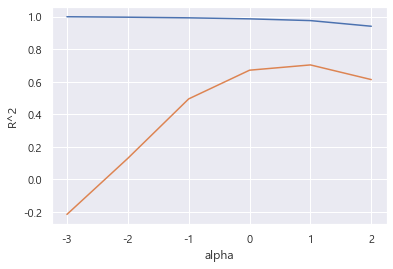

In [64]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
#파랑: 훈련세트 / 주황: 테스트 세트

- standard\
alpha = 1 이 가장 적합한 것으로 판단\
0.9621042632449137\
0.7762035900661869

In [65]:
ridge = Ridge(alpha=1)
ridge.fit(train_scaled, y_train)
print(ridge.score(train_scaled, y_train))
print(ridge.score(test_scaled, y_test))

0.9756958840013256
0.7035094716617403


- minmax\
alpha = -1 이 가장 적합한 것으로 판단\
0.9560336256940162\
0.7814911272758303

In [68]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, y_train)
print(ridge.score(train_scaled, y_train))
print(ridge.score(test_scaled, y_test))

0.9807625150163514
0.710380885753401


##### 라쏘

In [69]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, y_train)
print(lasso.score(train_scaled, y_train))
print(lasso.score(test_scaled, y_test)) 

0.994195063326156
0.3603369722866693


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.064e+12, tolerance: 2.073e+11
  model = cd_fast.enet_coordinate_descent(


In [70]:
train_score = []
test_score = []

In [71]:
# 적절한 alpha값 찾기(규제강도 정하기)
alpha_list = [0.001, 0.01, 0.1 , 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델 만들기
    lasso = Lasso(alpha=alpha, max_iter=10000) # max_iter : 반복횟수 
    # 라쏘 모델 훈련
    lasso.fit(train_scaled, y_train)
    # 훈련 점수와 테스트 점수 저장
    train_score.append(lasso.score(train_scaled, y_train))
    test_score.append(lasso.score(test_scaled, y_test))

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.638e+12, tolerance: 2.073e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.639e+12, tolerance: 2.073e+11
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

In [72]:
print(train_score)
print(test_score)

[0.9974552156879085, 0.9974549831046586, 0.9974526299374759, 0.9974285746450907, 0.9971586412321181, 0.9943773760079808]
[-0.14285182935298923, -0.14274491709686088, -0.14167173209380857, -0.13107864367776934, -0.0683961620801925, 0.41332795127851374]


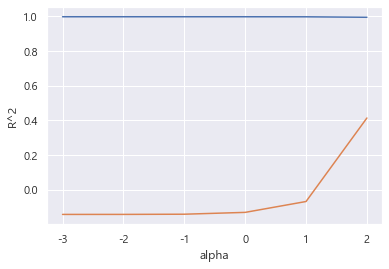

In [73]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
#파랑: 훈련세트 / 주황: 테스트 세트

- standard\
alpha=100\
0.9707538157973069\
0.7421789186289193

In [74]:
# standard
lasso = Lasso(alpha=100)
lasso.fit(train_scaled, y_train)
print(lasso.score(train_scaled, y_train))
print(lasso.score(test_scaled, y_test))

0.9926902817853255
0.5525019618846901


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.543e+12, tolerance: 2.073e+11
  model = cd_fast.enet_coordinate_descent(


- minmax\
alpha = 100\
0.9694576635676149\
0.7495005898690971

In [75]:
lasso = Lasso(alpha=100)
lasso.fit(train_scaled, y_train)
print(lasso.score(train_scaled, y_train))
print(lasso.score(test_scaled, y_test))

0.9926902817853255
0.5525019618846901


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.543e+12, tolerance: 2.073e+11
  model = cd_fast.enet_coordinate_descent(


In [76]:
# 라쏘 모델의 0인 계수의 갯수
print(np.sum(lasso.coef_ == 0))

208


## ----------------------------------------------------------------------------------------------------------------------

## 표준화(Standard)

In [81]:
# Numpy 를 이용한 표준화 : z = (x - mean())/std()
df_dr_standard = (df - np.mean(df, axis=0)) / np.std(df, axis=0)
df_dr_standard

,거주자수,일평균승하차(명),1인 가구수(세대),사업체수,상가 면적,일평균(원)
0,0.339065,-0.765385,1.733581,-0.241846,-0.487547,-0.668974
1,-0.784368,-0.731520,1.191488,-0.144670,-0.490985,-0.543833
2,-1.758850,-0.935587,0.648742,0.486972,-0.525371,-0.647801
3,0.517661,0.094641,-0.741760,-0.399757,-0.398146,-0.095497
4,0.537243,-0.353403,-0.355110,0.547707,-0.470354,-0.427862
...,...,...,...,...,...,...
95,-0.303065,-0.809475,-1.166290,-0.411904,-0.490985,-0.835193
96,0.671327,0.119380,-0.997131,-0.752019,-0.267482,0.168569
97,-0.006342,1.794353,0.507667,-0.399757,0.045423,1.197545
98,0.267445,0.663411,0.939382,0.134710,-0.322498,0.749317


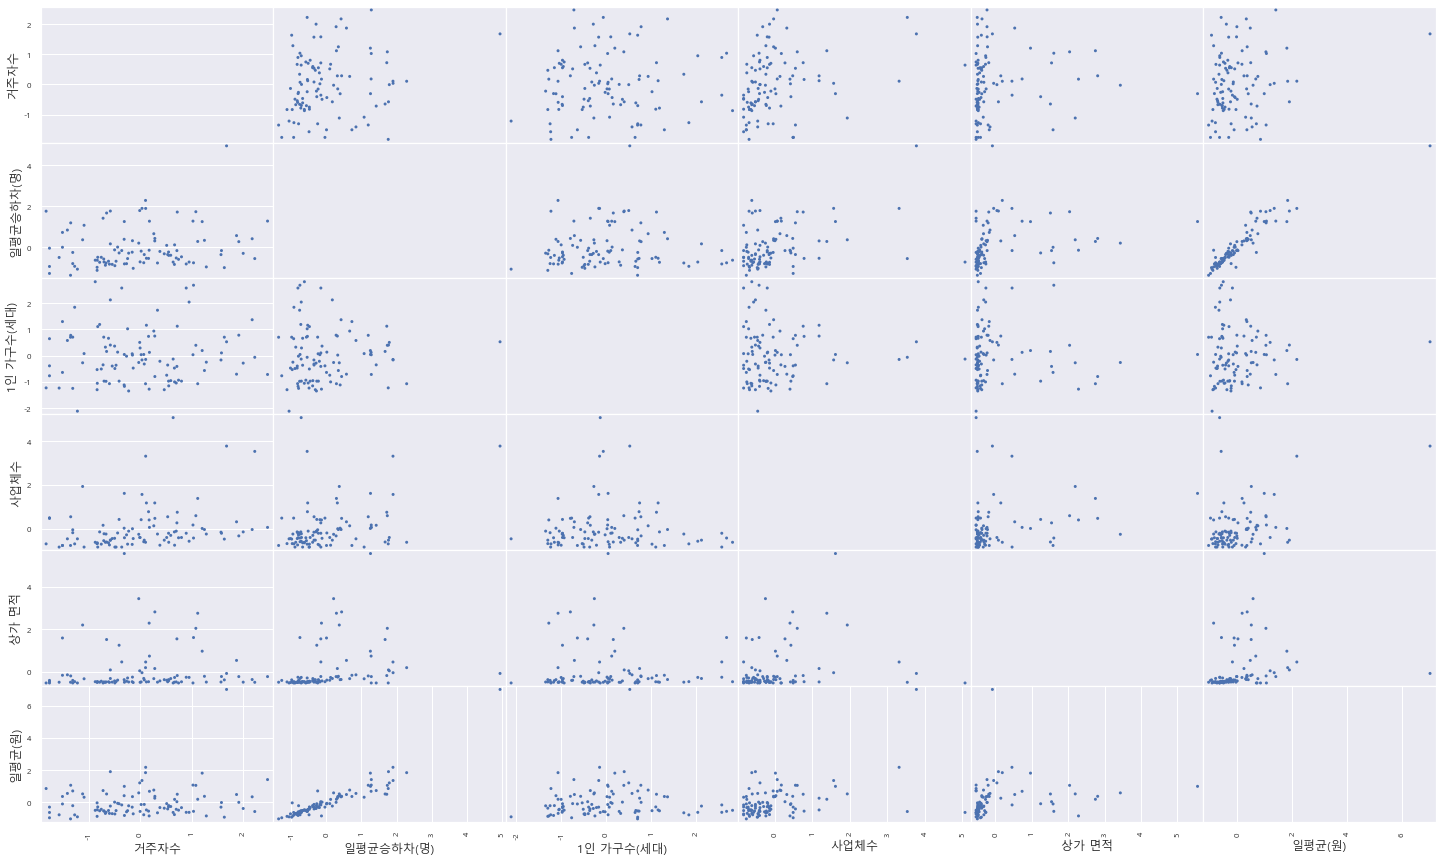

In [82]:
# 변수별 산점도
from pandas.plotting import scatter_matrix
scatter_matrix(df_dr_standard,
               alpha=1, ## 데이터 포인트의 투명도 1 = 가장진함, 0 = 완전투명
               figsize=(25,15), ## 캔버스 사이즈 조절
               diagonal=None) ## 대각 원소에는 아무것도 그리지 않는다.
plt.show()

### 다중회귀분석

#### 회귀모델 적합도

In [83]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [89]:
standard_x = df_dr_standard[['거주자수','일평균승하차(명)','1인 가구수(세대)','사업체수','상가 면적']]

In [90]:
standard_y = df_dr_standard[["일평균(원)"]]

In [91]:
# 테스트 훈련 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(standard_x, standard_y, test_size=0.3, random_state=42)

In [92]:
# Train the MLR / 회귀모델적합
# OLS(Ordinary Least Squares)
fullModel = sm.OLS(y_train,x_train)
fittedFullModel = fullModel.fit()

In [93]:
print(fittedFullModel.summary())

                                 OLS Regression Results                                
Dep. Variable:                 일평균(원)   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.864
Method:                 Least Squares   F-statistic:                              89.95
Date:                Thu, 01 Dec 2022   Prob (F-statistic):                    7.51e-28
Time:                        19:55:53   Log-Likelihood:                         -34.768
No. Observations:                  70   AIC:                                      79.54
Df Residuals:                      65   BIC:                                      90.78
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

- R-squared : 0.874
- Adj. R-squared : 0.864
- p-value : 일평균승하차,사업체수만 유의미

In [94]:
standard_x = df_dr_standard[["일평균승하차(명)","사업체수"]]

In [95]:
# 다시 테스트 훈련 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(standard_x, standard_y, test_size=0.3, random_state=42)

In [96]:
# 다시 회귀분석 실행
fullModel = sm.OLS(y_train,x_train)
fittedFullModel = fullModel.fit()

In [97]:
print(fittedFullModel.summary())

                                 OLS Regression Results                                
Dep. Variable:                 일평균(원)   R-squared (uncentered):                   0.871
Model:                            OLS   Adj. R-squared (uncentered):              0.867
Method:                 Least Squares   F-statistic:                              230.0
Date:                Thu, 01 Dec 2022   Prob (F-statistic):                    5.41e-31
Time:                        19:57:31   Log-Likelihood:                         -35.454
No. Observations:                  70   AIC:                                      74.91
Df Residuals:                      68   BIC:                                      79.40
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

- R-squared : 0.871
- Adj. R-squared : 0.867
- p-value : 일평균승하차, 사업체수 모두 유의미

#### 선형 회귀

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
mlr = LinearRegression()
multi_model = mlr.fit(x_train, y_train) 

In [100]:
# 훈련 정확도
multi_model.score(x_train, y_train)

0.8711592632844679

In [101]:
multi_model.score(x_test, y_test)

0.7266426845800127

#### 예측

In [102]:
my_predict = mlr.predict(x_test)
my_predict

array([[-0.77605298],
       [ 0.34873379],
       [-0.77011794],
       [-0.59821264],
       [-1.00331525],
       [-0.17774774],
       [-0.39711608],
       [ 1.16130766],
       [-0.82634878],
       [-0.74076331],
       [-0.50231061],
       [-0.24731222],
       [-0.74046149],
       [ 1.64629313],
       [-0.12849546],
       [-0.27274102],
       [-0.2545577 ],
       [ 0.70549031],
       [-0.76082251],
       [-0.70831484],
       [ 1.30571661],
       [-0.69419031],
       [-0.28348568],
       [ 0.28255027],
       [ 1.54780472],
       [-0.09588324],
       [-0.29976702],
       [ 0.00998287],
       [-0.66404807],
       [-0.40258701]])

#### 시각화

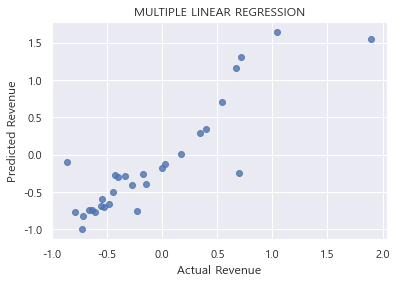

In [103]:
plt.scatter(y_test, my_predict, alpha=0.8)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

#### 상관계수 확인

In [104]:
print(mlr.coef_)

[[0.91502142 0.11531912]]


#### 라쏘 회귀 모델

In [105]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0)
lasso.fit(X=x_train, y=y_train)
print(lasso.score(X=x_train, y=y_train))
print(lasso.score(X=x_test, y=y_test))

0.8711592632844679
0.7266426845800129


C:\Users\admin\AppData\Local\Temp\ipykernel_19984\2117939037.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X=x_train, y=y_train)
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.638e+00, tolerance: 8.751e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/R

- 알파값 변경하면서 생성(6번)\
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

In [106]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

train_score = []
test_score = []

for alpha in alpha_list:  #여섯번 계산
    lasso = Lasso(alpha=alpha) #알파값 변경하면서 생성(6번)
    lasso.fit(X=x_train, y=y_train)

    train_score.append(lasso.score(X=x_train, y=y_train))
    test_score.append(lasso.score(X=x_test, y=y_test))

In [107]:
print(train_score)
print(test_score)

[0.8711583299475643, 0.8710647336730571, 0.8616942268671365, 0.17304928760208493, 0.0, 0.0]
[0.7272239568404985, 0.7324121170970215, 0.774426069861062, 0.1651162208717949, -0.05375639629839113, -0.05375639629839113]


#### (표준화)Lasso alpha별 score
- alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

<table border="1">
	<th>alpha</th>
	<th>train_score</th>
	<th>test_score</th>
	<tr>
		<td>0.001</td>
	    <td>0.8711583299475643</td>
	    <td>0.7272239568404985</td>
	</tr>
	<tr>
		<td>0.01</td>
	    <td>0.8710647336730571</td>
	    <td>0.7324121170970215</td>
	</tr>
	<tr>
		<td>0.1</td>
	    <td>0.8616942268671365</td>
	    <td>0.774426069861062</td>
	</tr>
	<tr>
		<td>1</td>
	    <td>0.17304928760208493</td>
	    <td>0.1651162208717949</td>
	</tr>
	<tr>
		<td>10</td>
	    <td>0.0</td>
	    <td>-0.05375639629839113</td>
	</tr>
	<tr>
		<td>100</td>
	    <td>0.0</td>
	    <td>-0.05375639629839113</td>
	</tr>
</table>

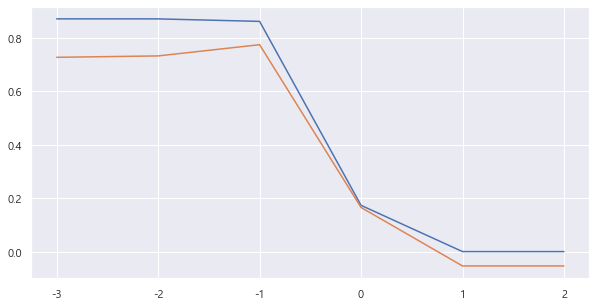

In [108]:
plt.figure(figsize=(10,5))
plt.plot(np.log10(alpha_list), train_score)
#그래프의 앞부분이 잘 안보여서 로그를 넣어 잘 볼 수 있도록 만듦
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [109]:
print(lasso.coef_) #결정계수
print(lasso.intercept_) # 절편

[0. 0.]
[0.04405346]


#### 릿지 회귀 모델

In [110]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X=x_train, y=y_train)
ridge.score(X=x_train, y=y_train)

0.8710377449109059

In [111]:
ridge.score(X=x_test, y=y_test)

0.7328920678992583

In [112]:
train_score = []
test_score = []

- 알파값 변경하면서 생성(6번)\
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

In [113]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:  #여섯번 계산
    ridge = Ridge(alpha=alpha) #알파값 변경하면서 생성(6번)
    ridge.fit(X=x_train, y=y_train)

    train_score.append(ridge.score(X=x_train, y=y_train))
    test_score.append(ridge.score(X=x_test, y=y_test))

In [114]:
print(train_score)
print(test_score)

[0.8711592631593683, 0.8711592507778142, 0.8711580159148196, 0.8710377449109059, 0.861598239729772, 0.63848584482297]
[0.7266492210278096, 0.7267080225550469, 0.7272934205784547, 0.7328920678992583, 0.7685623891744064, 0.6405705168388045]


In [115]:
print(ridge.coef_) #결정계수
print(ridge.intercept_) # 절편

[[0.40730715 0.13828403]]
[0.00977827]


#### (표준화)Ridge alpha별 score
- alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

<table border="1">
	<th>alpha</th>
	<th>train_score</th>
	<th>test_score</th>
	<tr>
		<td>0.001</td>
	    <td>0.8711592631593683</td>
	    <td>0.7266492210278096</td>
	</tr>
	<tr>
		<td>0.01</td>
	    <td>0.8711592507778142</td>
	    <td>0.7267080225550469</td>
	</tr>
	<tr>
		<td>0.1</td>
	    <td>0.8711580159148196</td>
	    <td>0.7272934205784547</td>
	</tr>
	<tr>
		<td>1</td>
	    <td>0.8710377449109059</td>
	    <td>0.7328920678992583</td>
	</tr>
	<tr>
		<td>10</td>
	    <td>0.861598239729772</td>
	    <td>0.7685623891744064</td>
	</tr>
	<tr>
		<td>100</td>
	    <td>0.63848584482297</td>
	    <td>0.6405705168388045</td>
	</tr>
</table>

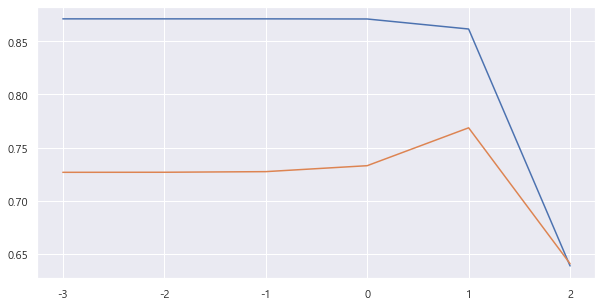

In [116]:
plt.figure(figsize=(10,5))
plt.plot(np.log10(alpha_list), train_score)
#그래프의 앞부분이 잘 안보여서 로그를 넣어 잘 볼 수 있도록 만듦
plt.plot(np.log10(alpha_list), test_score)
plt.show()

## MinMaxScaler(정규화)

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
df.max()

역사명                화명역
거주자수             48795
일평균승하차(명)        57826
1인 가구수(세대)        7952
사업체수               487
상가 면적           1767.0
일평균(원)        39388852
dtype: object

In [40]:
df.min()

역사명             가야역
거주자수           1355
일평균승하차(명)       346
1인 가구수(세대)      404
사업체수              0
상가 면적           0.0
일평균(원)        86682
dtype: object

In [41]:
df.drop(["역사명"],axis=1,inplace=True)

In [42]:
scaler = MinMaxScaler()
scaler.fit(df)

MinMaxScaler()

In [43]:
df_scaled = scaler.transform(df)

In [44]:
minmaxscaled_df = pd.DataFrame(df_scaled, columns=df.columns)
minmaxscaled_df

,거주자수,일평균승하차(명),1인 가구수(세대),사업체수,상가 면적,일평균(원)
0,0.502993,0.094868,0.779942,0.100616,0.006225,0.046801
1,0.241779,0.100226,0.669979,0.117043,0.005659,0.062298
2,0.015198,0.067937,0.559883,0.223819,0.000000,0.049423
3,0.544519,0.230950,0.277822,0.073922,0.020939,0.117815
4,0.549073,0.160056,0.356253,0.234086,0.009055,0.076658
...,...,...,...,...,...,...
95,0.353689,0.087891,0.191706,0.071869,0.005659,0.026219
96,0.580249,0.234864,0.226020,0.014374,0.042445,0.150515
97,0.422681,0.499896,0.531267,0.073922,0.093945,0.277933
98,0.486341,0.320946,0.618839,0.164271,0.033390,0.222429


In [45]:
print(minmaxscaled_df.max())
print(minmaxscaled_df.min())

거주자수          1.0
일평균승하차(명)     1.0
1인 가구수(세대)    1.0
사업체수          1.0
상가 면적         1.0
일평균(원)        1.0
dtype: float64
거주자수          0.0
일평균승하차(명)     0.0
1인 가구수(세대)    0.0
사업체수          0.0
상가 면적         0.0
일평균(원)        0.0
dtype: float64


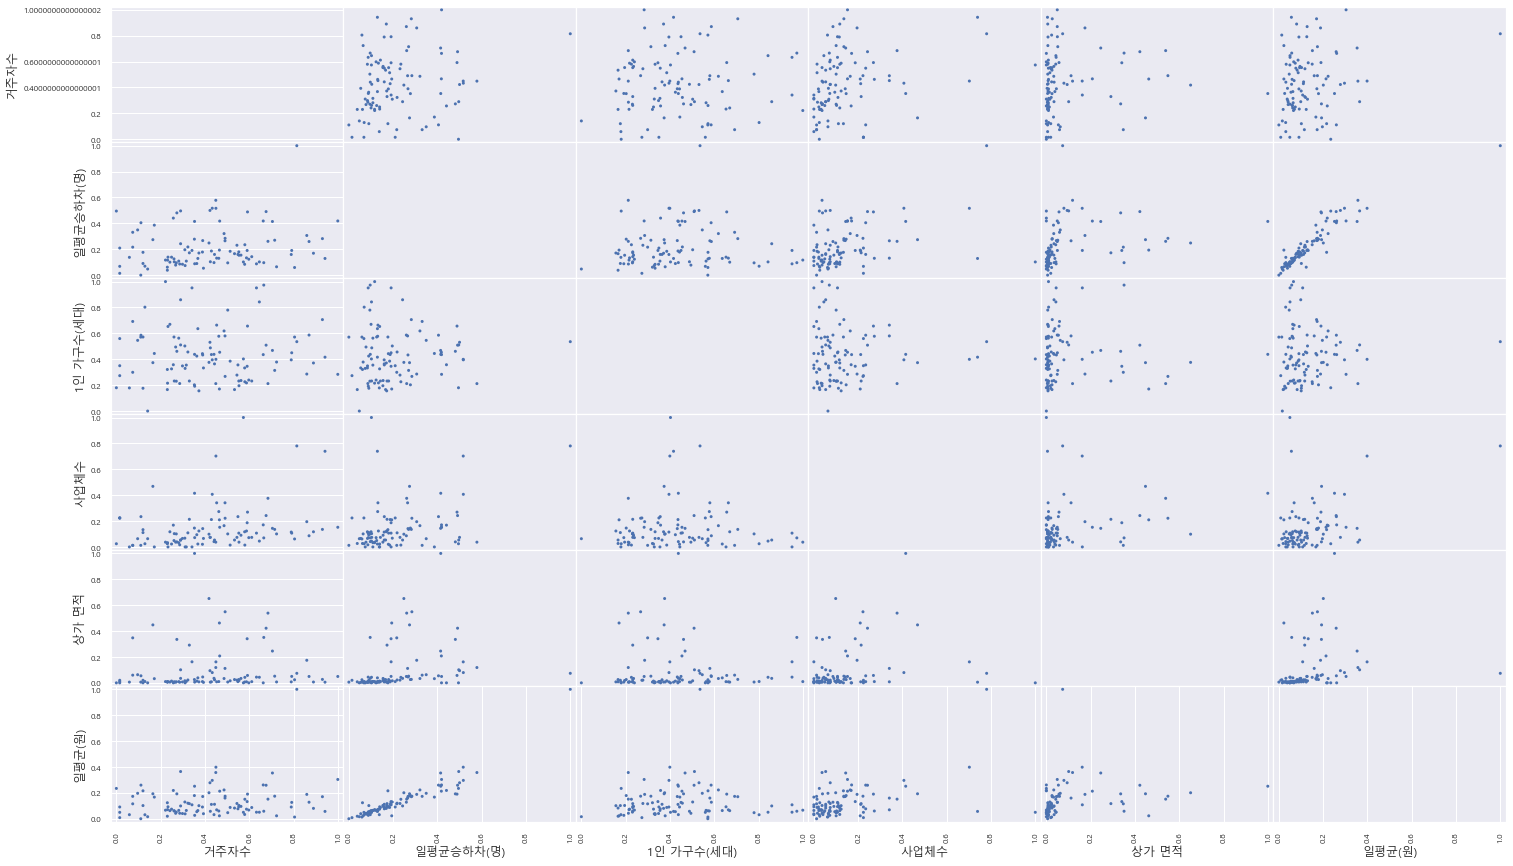

In [46]:
# 변수별 산점도
from pandas.plotting import scatter_matrix
scatter_matrix(minmaxscaled_df,
               alpha=1, ## 데이터 포인트의 투명도 1 = 가장진함, 0 = 완전투명
               figsize=(25,15), ## 캔버스 사이즈 조절
               diagonal=None) ## 대각 원소에는 아무것도 그리지 않는다.
plt.show()

### 상관계수 확인

In [47]:
df_minmaxscale_corr = minmaxscaled_df.corr()
df_minmaxscale_corr

,거주자수,일평균승하차(명),1인 가구수(세대),사업체수,상가 면적,일평균(원)
거주자수,1.000000,0.177225,0.041797,0.278248,0.071730,0.199948
일평균승하차(명),0.177225,1.000000,0.033473,0.355560,0.300601,0.919696
1인 가구수(세대),0.041797,0.033473,1.000000,-0.011647,-0.032205,0.036853
사업체수,0.278248,0.355560,-0.011647,1.000000,0.234948,0.420679
상가 면적,0.071730,0.300601,-0.032205,0.234948,1.000000,0.238792
일평균(원),0.199948,0.919696,0.036853,0.420679,0.238792,1.000000


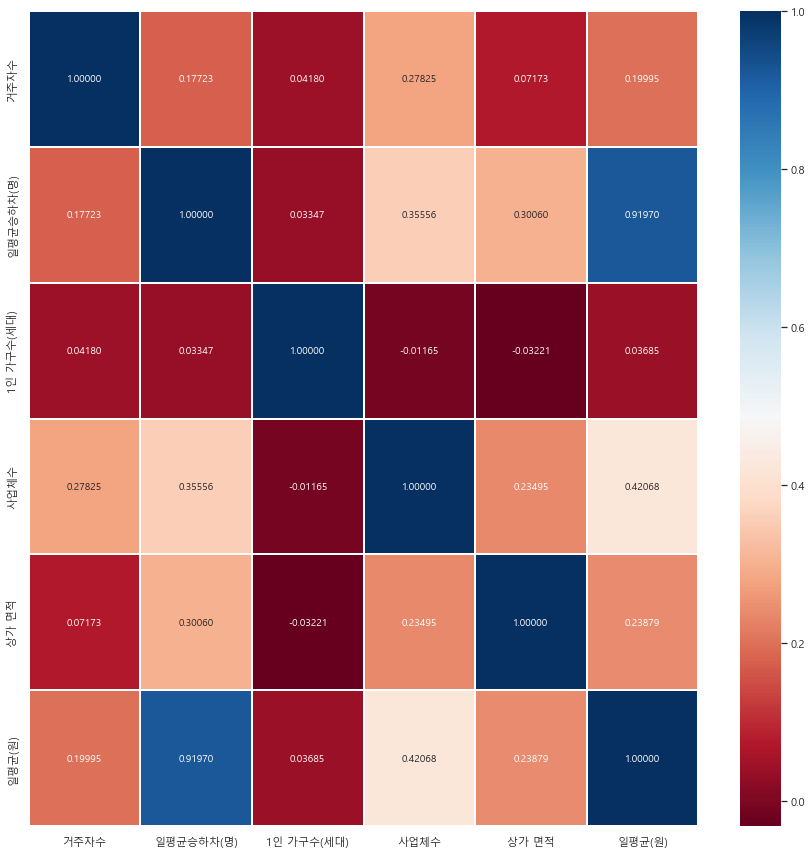

In [48]:
plt.figure(figsize=(15,15))
color_map = plt.cm.RdBu

sns.heatmap(df_minmaxscale_corr, annot=True, fmt='.5f', linewidths=0.1, cmap=color_map)
plt.show()

### 다중회귀분석

#### 회귀모델 적합도

In [49]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [50]:
minmaxscale_x = minmaxscaled_df[['거주자수','일평균승하차(명)','1인 가구수(세대)','사업체수','상가 면적']]

In [51]:
minmaxscale_y = minmaxscaled_df[['일평균(원)']]

In [52]:
# 테스트 훈련 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(minmaxscale_x, minmaxscale_y, test_size=0.3, random_state=42)

In [53]:
# Train the MLR / 회귀모델적합
# OLS(Ordinary Least Squares)
fullModel = sm.OLS(y_train,x_train)
fittedFullModel = fullModel.fit()

In [54]:
print(fittedFullModel.summary())

                                 OLS Regression Results                                
Dep. Variable:                 일평균(원)   R-squared (uncentered):                   0.929
Model:                            OLS   Adj. R-squared (uncentered):              0.923
Method:                 Least Squares   F-statistic:                              169.7
Date:                Thu, 01 Dec 2022   Prob (F-statistic):                    6.58e-36
Time:                        19:38:57   Log-Likelihood:                          108.17
No. Observations:                  70   AIC:                                     -206.3
Df Residuals:                      65   BIC:                                     -195.1
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

- R-squared : 0.929
- Adj. R-squared : 0.923
- p-value : 일평균 승하차, 1인 가구수, 사업체수만 유의미

In [57]:
minmaxscale_x = minmaxscaled_df[["일평균승하차(명)","1인 가구수(세대)","사업체수"]]

In [58]:
# 다시 테스트 훈련 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(minmaxscale_x, minmaxscale_y, test_size=0.3, random_state=42)

In [59]:
# 다시 회귀분석 실행
fullModel = sm.OLS(y_train,x_train)
fittedFullModel = fullModel.fit()

In [60]:
print(fittedFullModel.summary())

                                 OLS Regression Results                                
Dep. Variable:                 일평균(원)   R-squared (uncentered):                   0.928
Model:                            OLS   Adj. R-squared (uncentered):              0.925
Method:                 Least Squares   F-statistic:                              288.5
Date:                Thu, 01 Dec 2022   Prob (F-statistic):                    3.11e-38
Time:                        19:39:58   Log-Likelihood:                          107.83
No. Observations:                  70   AIC:                                     -209.7
Df Residuals:                      67   BIC:                                     -202.9
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

- R-squared : 0.928
- Adj. R-squared : 0.925
- p-value : 모두 유의미

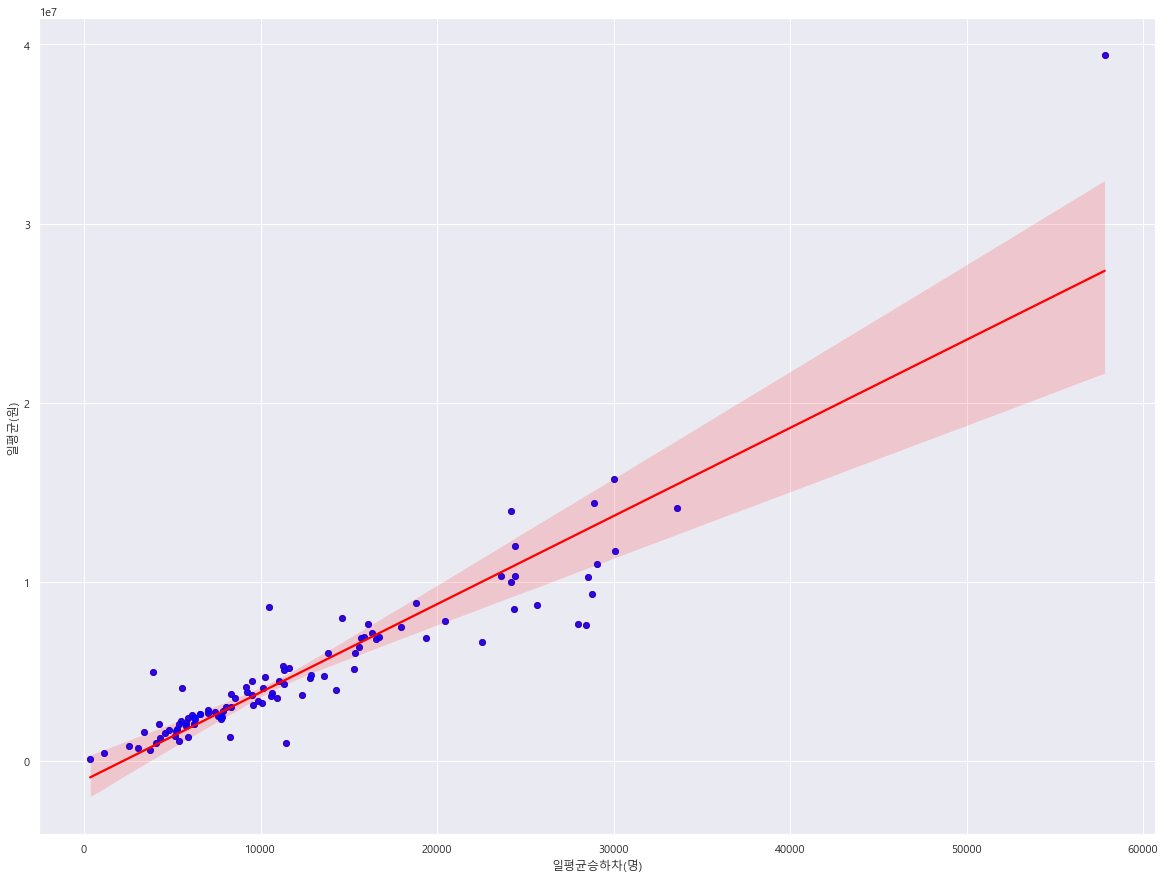

In [19]:
plt.figure(figsize=(20,15))
sns.regplot(x='일평균승하차(명)', y='일평균(원)', data=df, color="red")
plt.scatter(df[['일평균승하차(명)']], df[['일평균(원)']], alpha=0.8, color='blue')
plt.show()

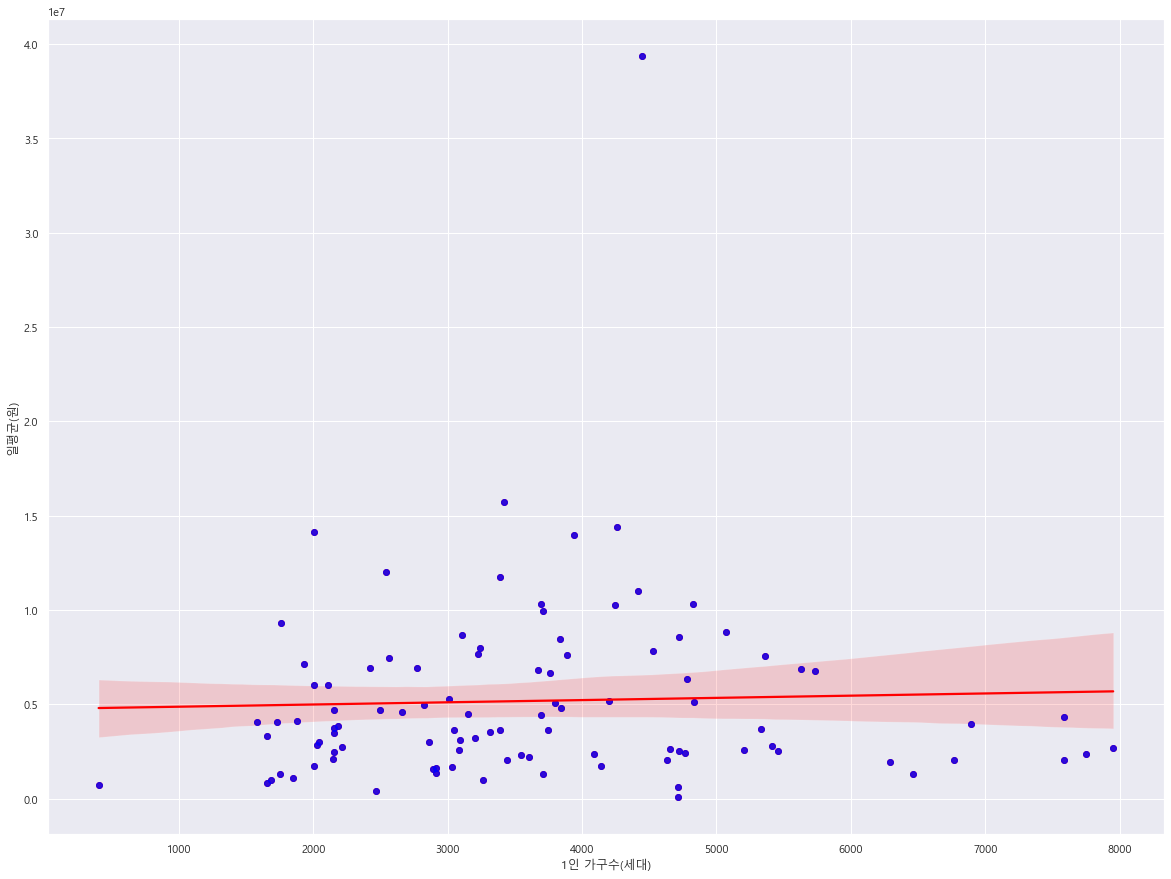

In [20]:
plt.figure(figsize=(20,15))
sns.regplot(x='1인 가구수(세대)', y='일평균(원)', data=df, color="red")
plt.scatter(df[['1인 가구수(세대)']], df[['일평균(원)']], alpha=0.8, color='blue')
plt.show()

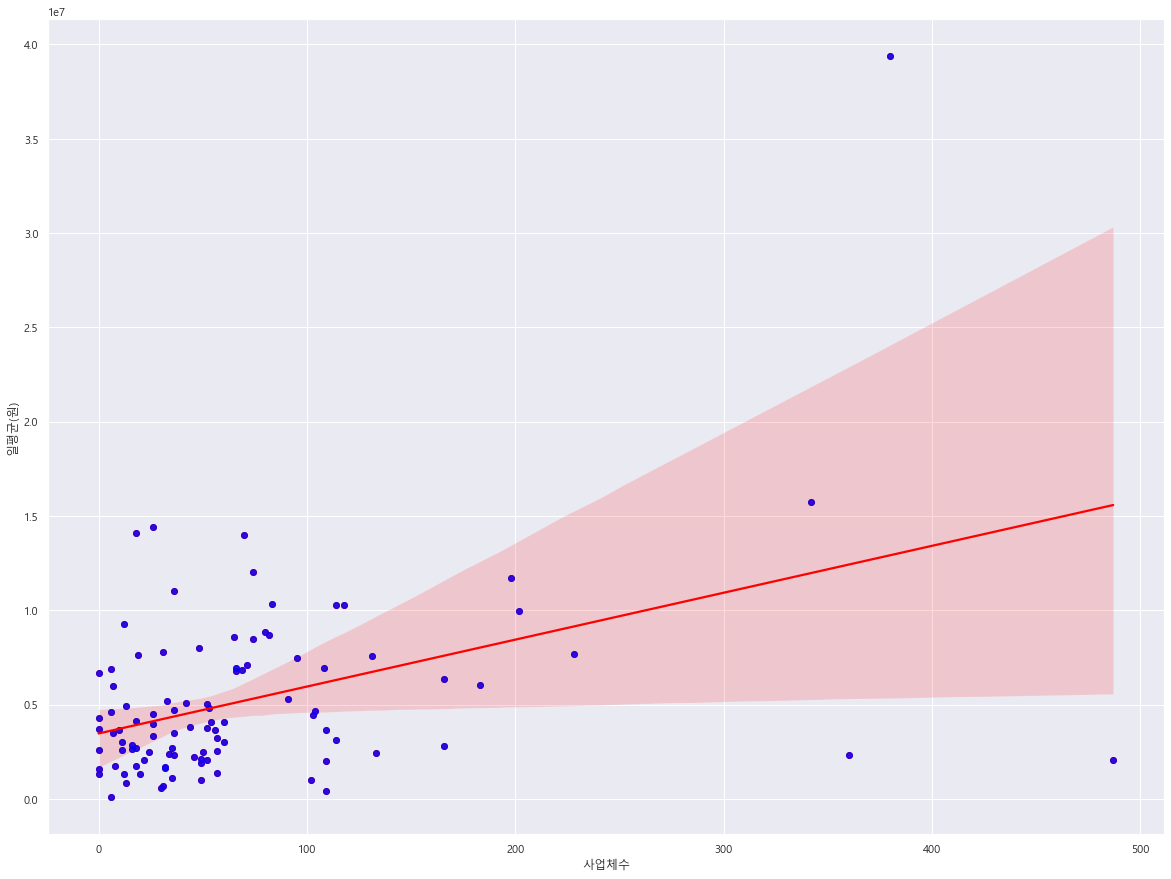

In [21]:
plt.figure(figsize=(20,15))
sns.regplot(x='사업체수', y='일평균(원)', data=df, color="red")
plt.scatter(df[['사업체수']], df[['일평균(원)']], alpha=0.8, color='blue')
plt.show()

#### 선형 회귀

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
mlr = LinearRegression()
multi_model = mlr.fit(x_train, y_train) 

In [63]:
# 훈련 정확도
multi_model.score(x_train, y_train)

0.8711747785020669

In [64]:
multi_model.score(x_test, y_test)

0.7268469556284333

#### 예측

In [65]:
my_predict = mlr.predict(x_test)
my_predict

array([[0.03349975],
       [0.17221459],
       [0.03426939],
       [0.05590152],
       [0.00512138],
       [0.10779083],
       [0.08026997],
       [0.27348593],
       [0.02707597],
       [0.03878377],
       [0.06686542],
       [0.09935433],
       [0.03740822],
       [0.33368367],
       [0.11348583],
       [0.09565009],
       [0.09943379],
       [0.21727708],
       [0.03474638],
       [0.04224477],
       [0.29112007],
       [0.04314153],
       [0.09439593],
       [0.1646122 ],
       [0.32149286],
       [0.11707265],
       [0.09234245],
       [0.13032685],
       [0.04683155],
       [0.07926139]])

#### 시각화

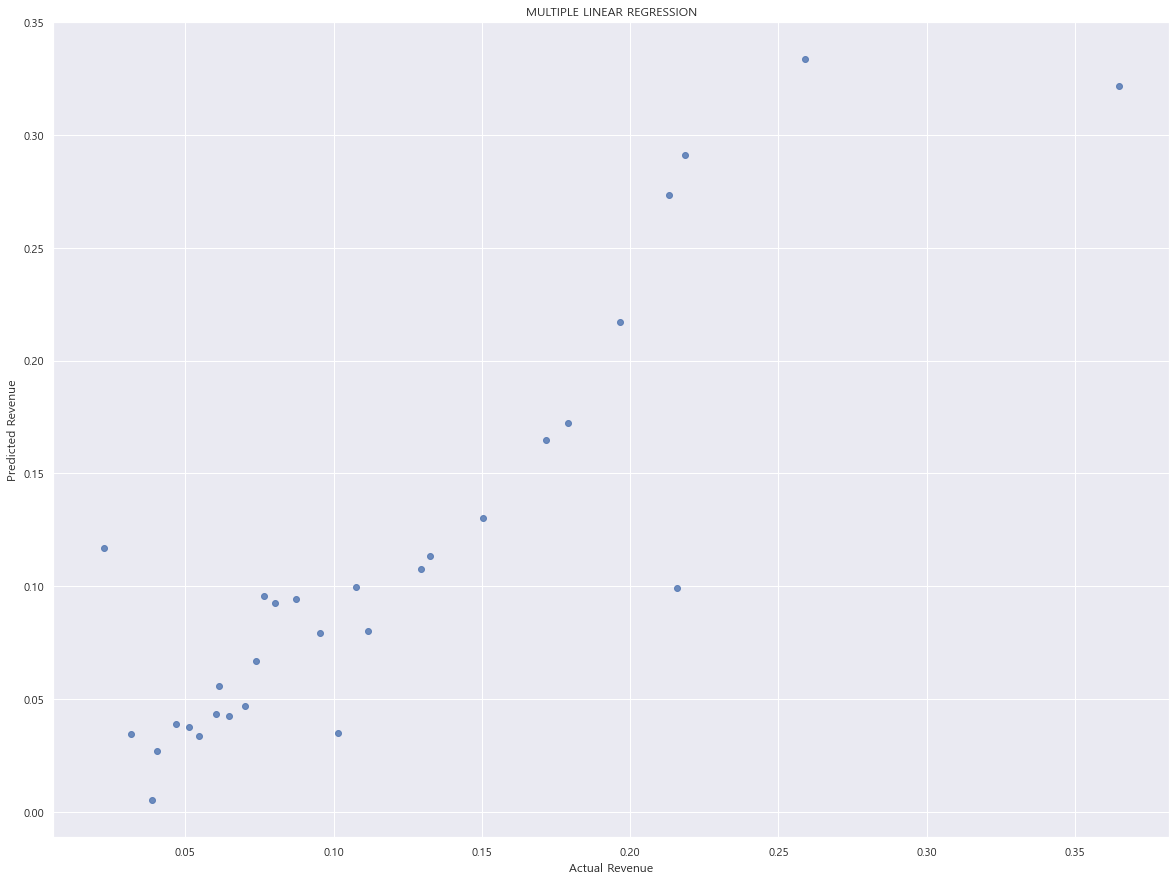

In [66]:
plt.figure(figsize=(20,15))
plt.scatter(y_test, my_predict, alpha=0.8)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

#### 상관계수 확인

In [67]:
print(mlr.coef_)

[[0.71611042 0.00257231 0.08447165]]


#### 라쏘 회귀 모델

In [75]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0)
lasso.fit(X=x_train, y=y_train)
print(lasso.score(X=x_train, y=y_train))
print(lasso.score(X=x_test, y=y_test))

0.8711747785020669
0.7268469556284329


C:\Users\admin\AppData\Local\Temp\ipykernel_19984\2117939037.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X=x_train, y=y_train)
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.644e-02, tolerance: 1.342e-04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/R

- 알파값 변경하면서 생성(6번)\
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

In [76]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

train_score = []
test_score = []

for alpha in alpha_list:  #여섯번 계산
    lasso = Lasso(alpha=alpha) #알파값 변경하면서 생성(6번)
    lasso.fit(X=x_train, y=y_train)

    train_score.append(lasso.score(X=x_train, y=y_train))
    test_score.append(lasso.score(X=x_test, y=y_test))

In [77]:
print(train_score)
print(test_score)

[0.8688282508182219, 0.6802001248948124, 0.0, 0.0, 0.0, 0.0]
[0.7534958160260992, 0.7266360273681028, -0.05375639629839157, -0.05375639629839157, -0.05375639629839157, -0.05375639629839157]


In [78]:
print(lasso.coef_) #결정계수
print(lasso.intercept_) # 절편

[ 0. -0.  0.]
[0.13509576]


##### (정규화)Lasso alpha별 score
- alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

<table border="1">
	<th>alpha</th>
	<th>train_score</th>
	<th>test_score</th>
	<tr>
		<td>0.001</td>
	    <td>0.8688282508182219</td>
	    <td>0.7534958160260992</td>
	</tr>
	<tr>
		<td>0.01</td>
	    <td>0.6802001248948124</td>
	    <td>0.7266360273681028</td>
	</tr>
	<tr>
		<td>0.1</td>
	    <td>0.0</td>
	    <td>-0.05375639629839157</td>
	</tr>
	<tr>
		<td>1</td>
	    <td>0.0</td>
	    <td> -0.05375639629839157</td>
	</tr>
	<tr>
		<td>10</td>
	    <td>0.0</td>
	    <td>-0.05375639629839157</td>
	</tr>
	<tr>
		<td>100</td>
	    <td>0.0</td>
	    <td> -0.05375639629839157</td>
	</tr>
</table>

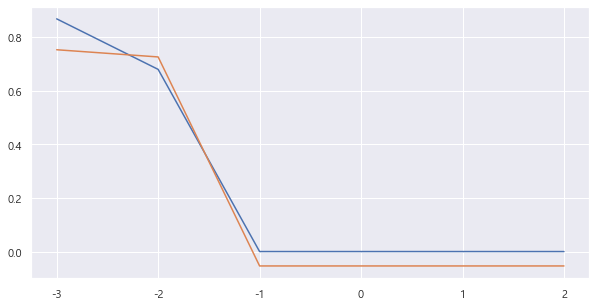

In [79]:
plt.figure(figsize=(10,5))
plt.plot(np.log10(alpha_list), train_score)
#그래프의 앞부분이 잘 안보여서 로그를 넣어 잘 볼 수 있도록 만듦
plt.plot(np.log10(alpha_list), test_score)
plt.show()

#### 릿지 회귀 모델

In [68]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X=x_train, y=y_train)
ridge.score(X=x_train, y=y_train)

0.7881599906999417

In [69]:
ridge.score(X=x_test, y=y_test)

0.7617112115161908

In [70]:
train_score = []
test_score = []

- 알파값 변경하면서 생성(6번)\
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

In [71]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list:  #여섯번 계산
    ridge = Ridge(alpha=alpha) #알파값 변경하면서 생성(6번)
    ridge.fit(X=x_train, y=y_train)

    train_score.append(ridge.score(X=x_train, y=y_train))
    test_score.append(ridge.score(X=x_test, y=y_test))

In [72]:
print(train_score)
print(test_score)

[0.871174577566307, 0.8711548953469409, 0.8693786621431661, 0.7881599906999417, 0.31433492328839086, 0.043434566928711726]
[0.7271080725562011, 0.7294157705923525, 0.7486850827548219, 0.7617112115161908, 0.2962166128373942, -0.005149200479365179]


In [73]:
print(ridge.coef_) #결정계수
print(ridge.intercept_) # 절편

[[ 1.49758858e-02 -2.30124717e-05  7.93841263e-03]]
[0.13049262]


##### (정규화)Ridge alpha별 score
- alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

<table border="1">
	<th>alpha</th>
	<th>train_score</th>
	<th>test_score</th>
	<tr>
		<td>0.001</td>
	    <td>0.871174577566307</td>
	    <td>0.7271080725562011</td>
	</tr>
	<tr>
		<td>0.01</td>
	    <td>0.8711548953469409</td>
	    <td>0.7294157705923525</td>
	</tr>
	<tr>
		<td>0.1</td>
	    <td>0.8693786621431661</td>
	    <td>0.7486850827548219</td>
	</tr>
	<tr>
		<td>1</td>
	    <td>0.7881599906999417</td>
	    <td>0.7617112115161908</td>
	</tr>
	<tr>
		<td>10</td>
	    <td>0.31433492328839086</td>
	    <td>0.2962166128373942</td>
	</tr>
	<tr>
		<td>100</td>
	    <td>0.043434566928711726</td>
	    <td>-0.005149200479365179</td>
	</tr>
</table>

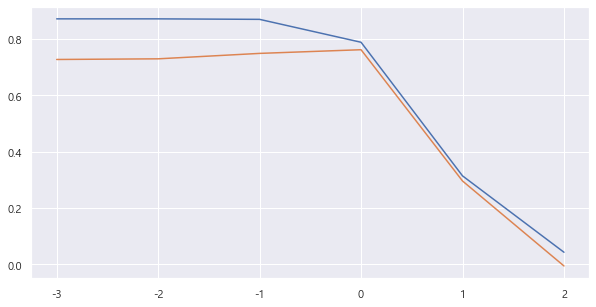

In [74]:
plt.figure(figsize=(10,5))
plt.plot(np.log10(alpha_list), train_score)
#그래프의 앞부분이 잘 안보여서 로그를 넣어 잘 볼 수 있도록 만듦
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [62]:
ridge = Ridge(alpha=0.01)
ridge.fit(X=x_train, y=y_train)
print(ridge.score(X=x_train, y=y_train))
print(ridge.score(X=x_test, y=y_test))


0.9405509316796355
0.9020595446600363


train_score와 test_score값이 떨어지기 전 + 일치할 때인, alpha가 0.01일떄 가장 최적화됐다.\
(train,test의 차이가 가장 적고 높은 점수인 0.01)

#### Min-max scaler로 정규화한 데이터를 가지고 Ridge모델을 사용하는 것이 가장 좋은 결과가 나옴

#### 모델 저장

In [63]:
import pickle

In [80]:
# 모델 저장
filename = 'saved_ridge_model(alpha=0.01).sav'
pickle.dump(ridge, open(filename, 'wb')) # w:쓰기, r:읽기

In [81]:
# 모델 불러오기
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

Ridge(alpha=0.01)

#### 예측

예측 정확도가 위의 모델(0.01)의 train과 test 범위 사이에 있거나 train_score보다 높으면 됨